In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import essentia.standard as es
import madmom
from scipy import signal
from utilities import *

In [3]:
#Get all files with mp3 extension in the folder
path = 'good-sounds_Sax_SingleNotes/saxo_raul_recordings/iphone'
#path = 'segments'
audios = []
fs = 44100
for file in os.listdir(path):
    if file.endswith(".wav"):
        audios.append(os.path.join(path, file))

In [3]:
audios = (sorted(audios))

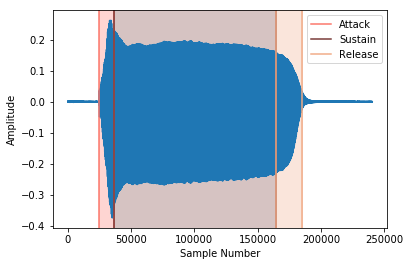

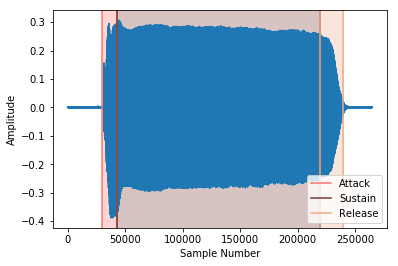

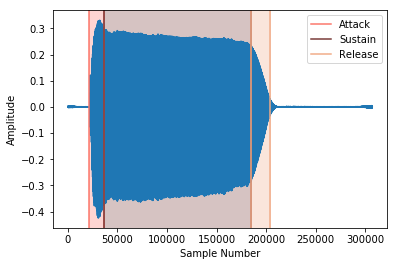

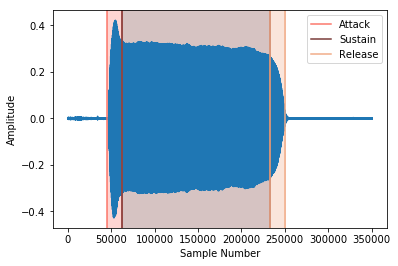

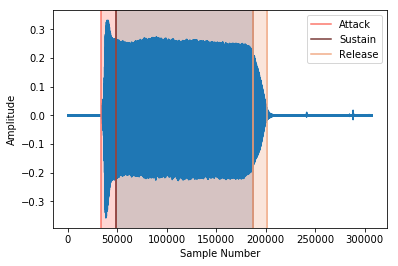

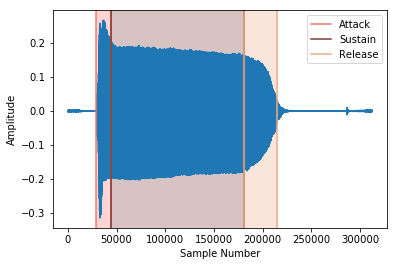

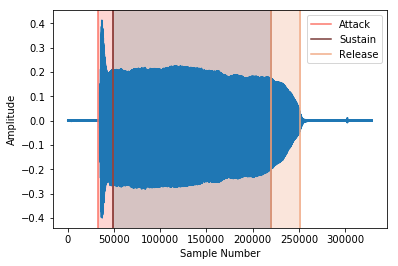

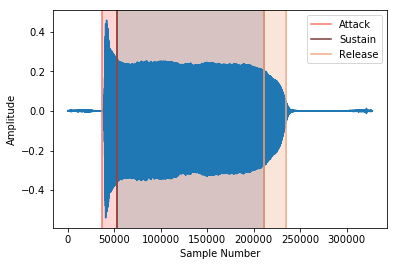

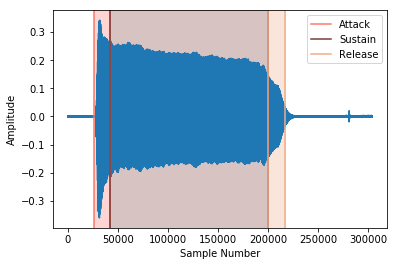

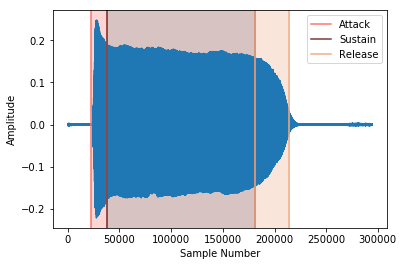

this


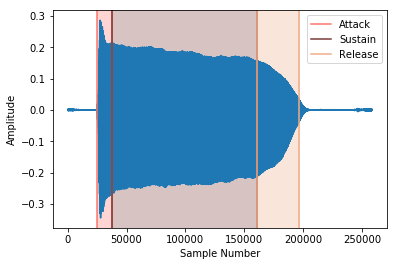

this


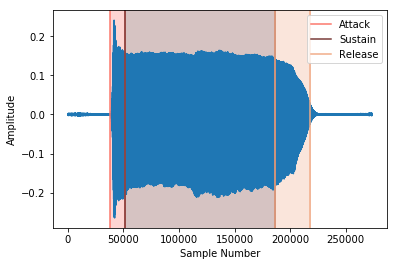

this


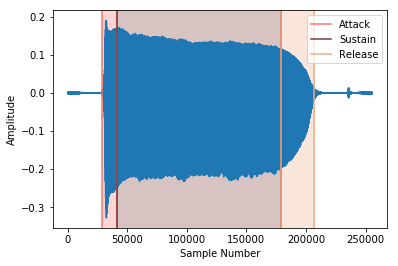

this


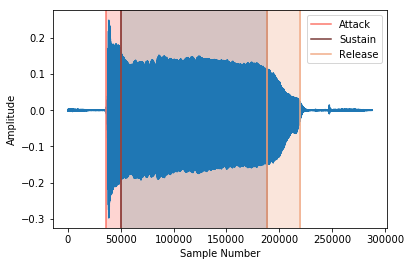

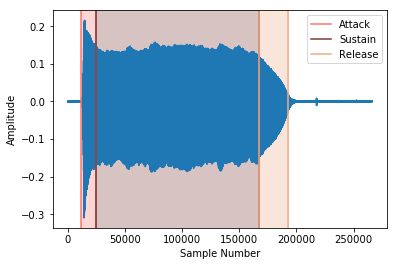

this


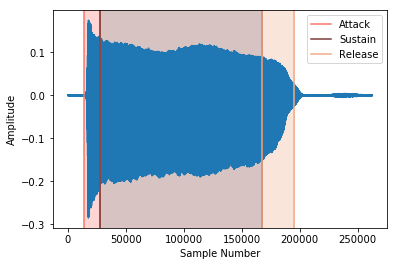

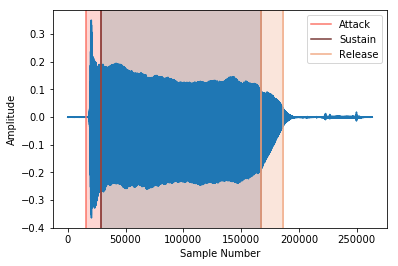

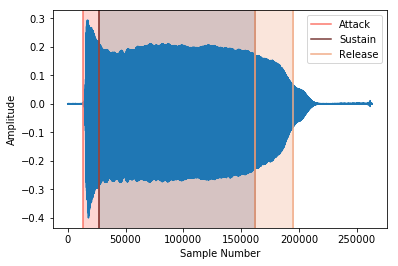

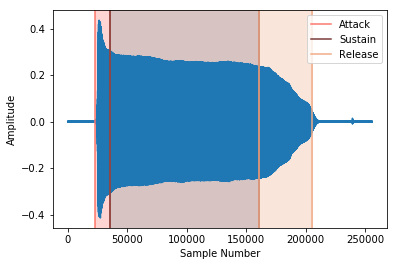

this


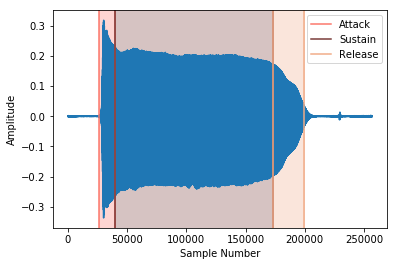

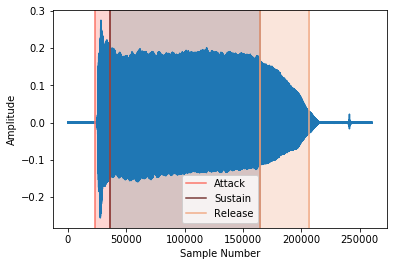

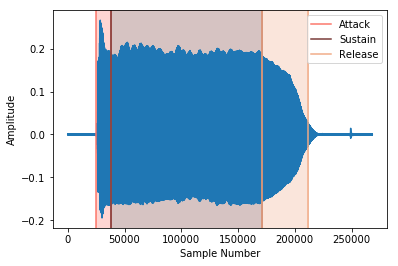

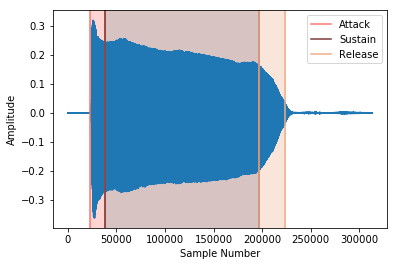

this


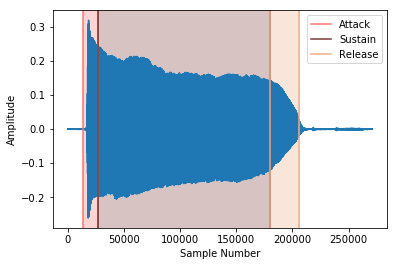

this


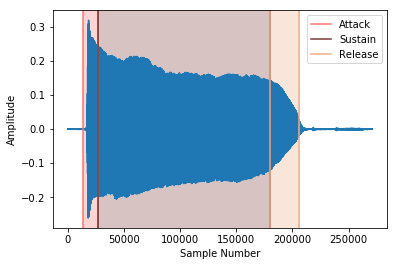

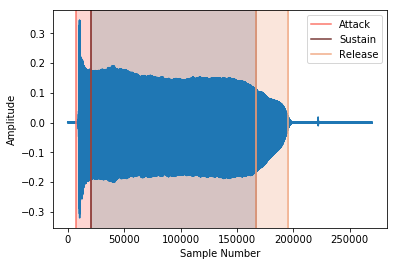

this


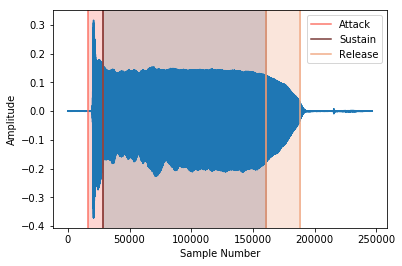

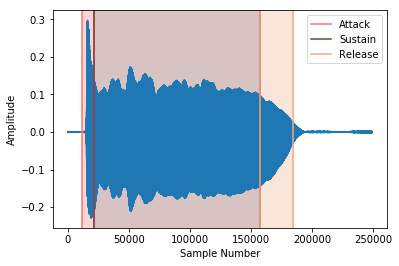

this


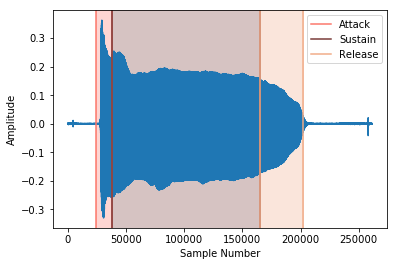

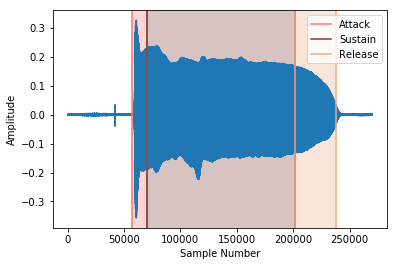

this


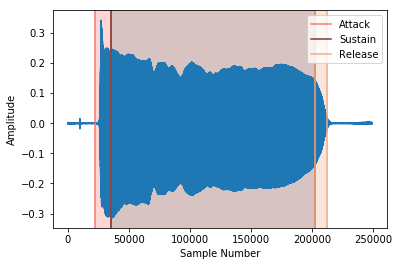

this


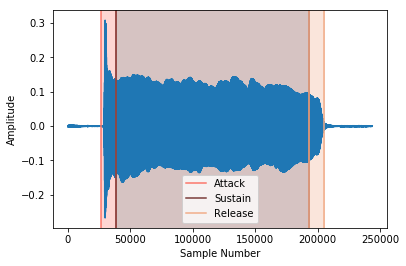

this


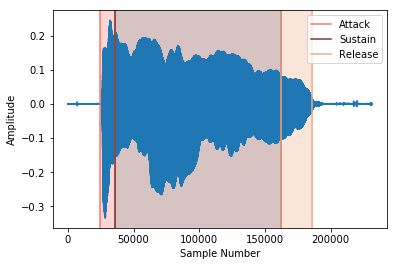

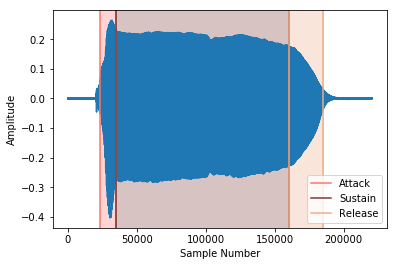

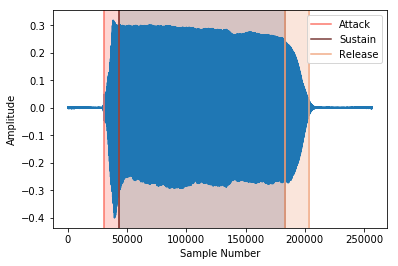

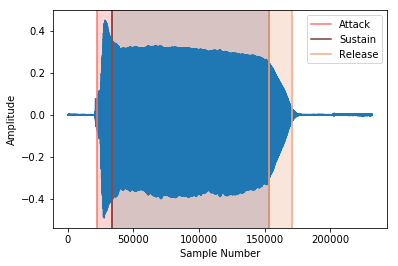

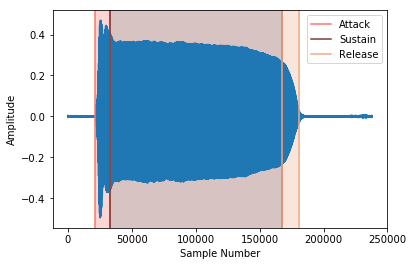

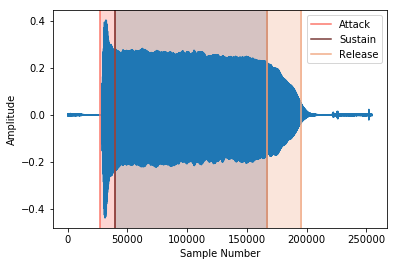

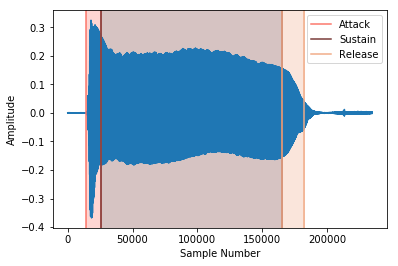

this


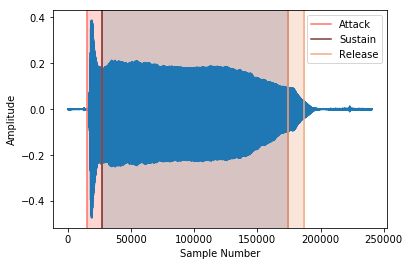

this


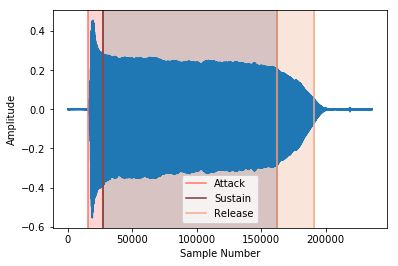

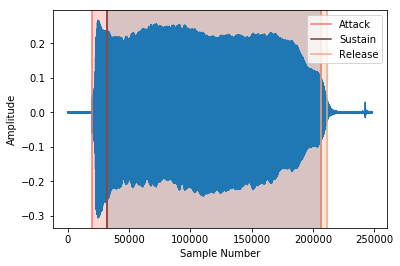

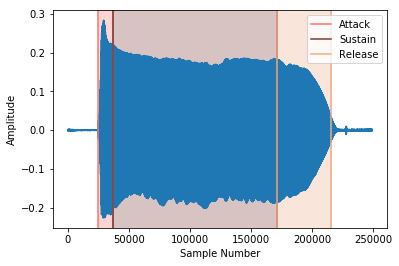

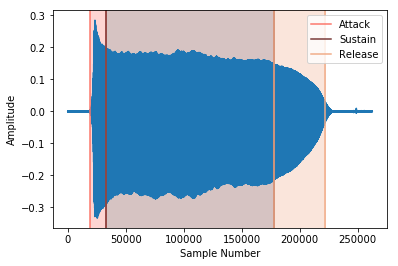

this


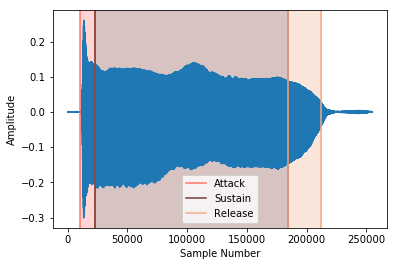

this


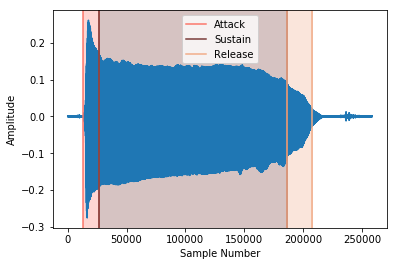

this


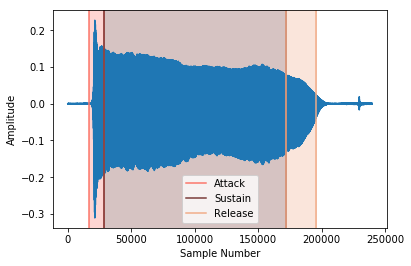

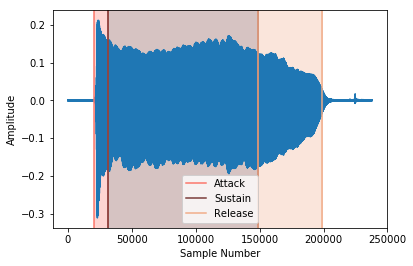

this


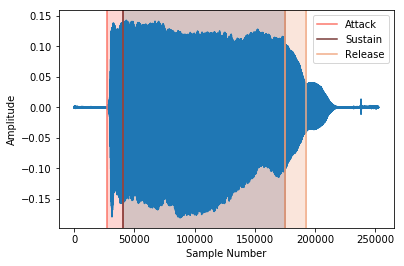

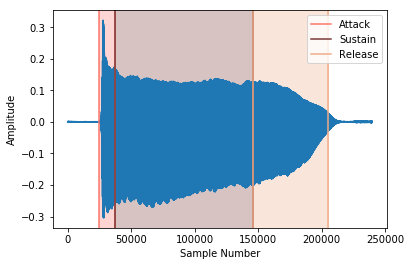

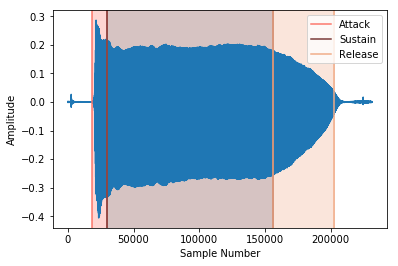

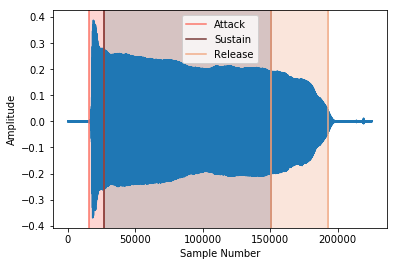

this


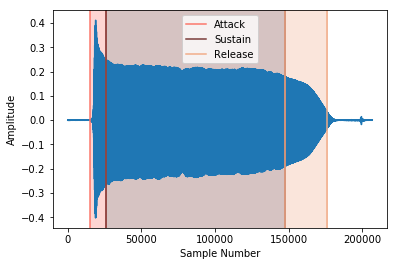

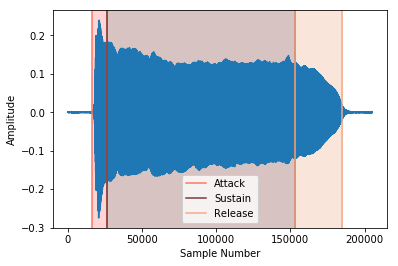

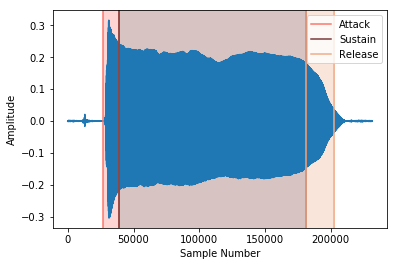

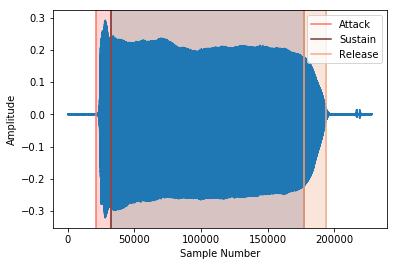

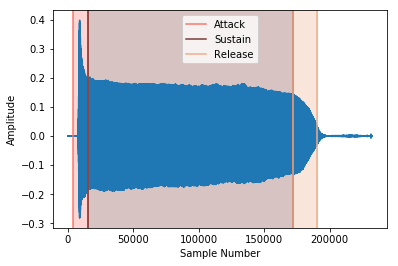

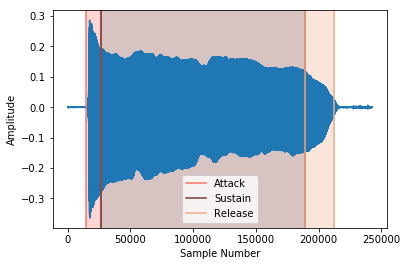

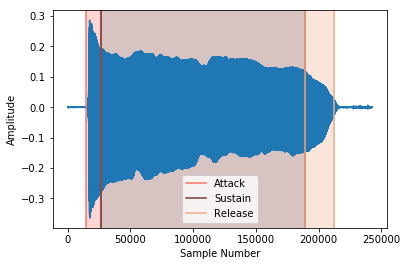

this


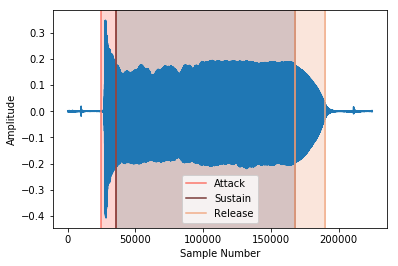

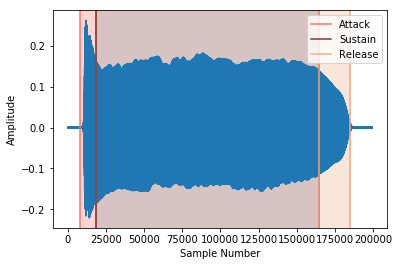

this


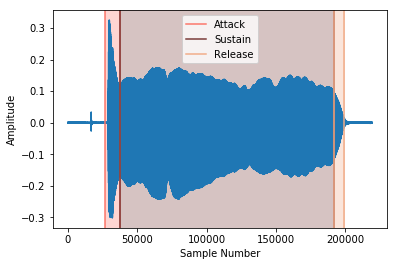

this


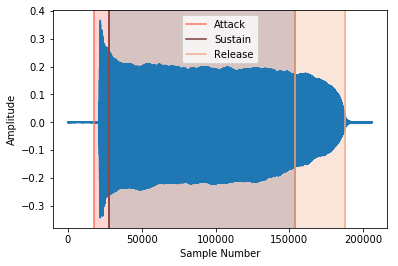

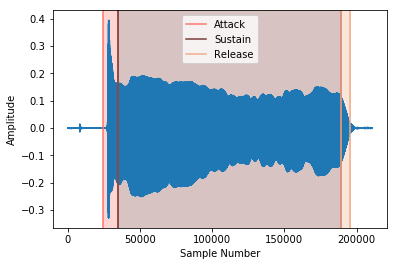

this


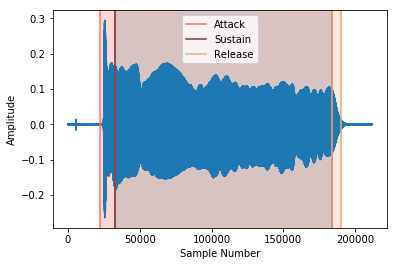

this


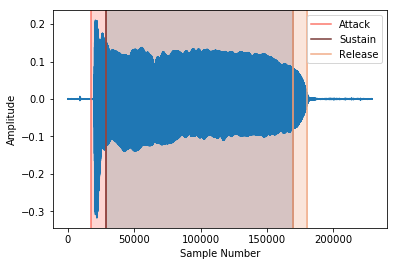

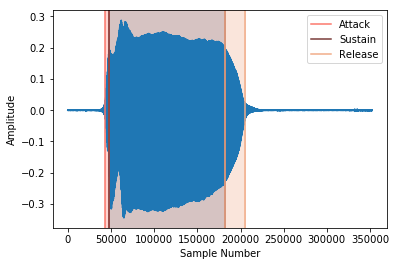

this


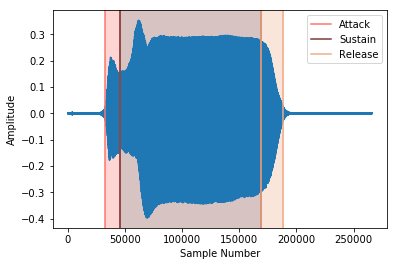

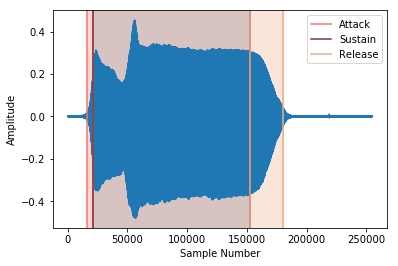

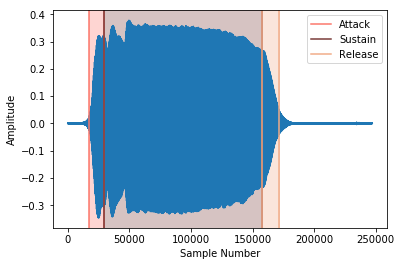

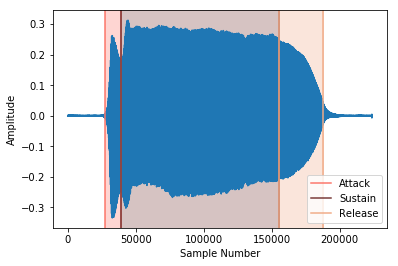

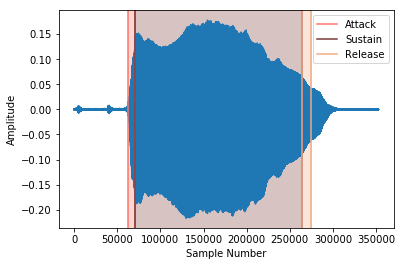

this


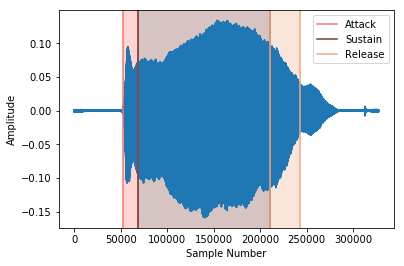

this


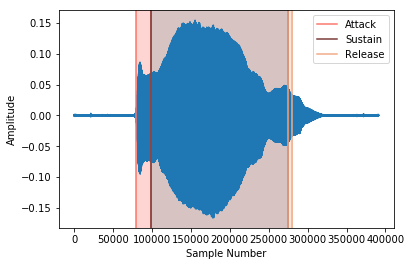

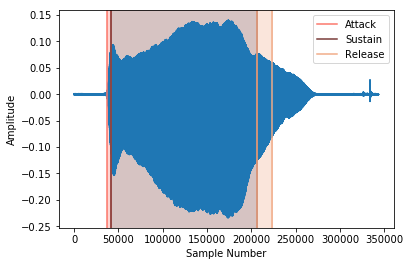

this


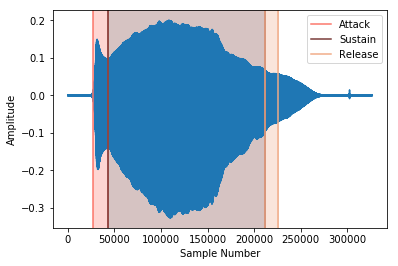

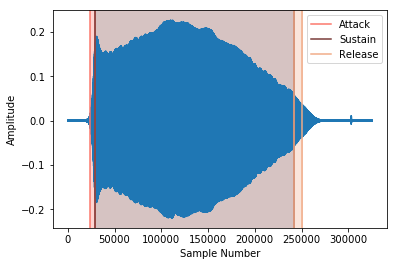

this


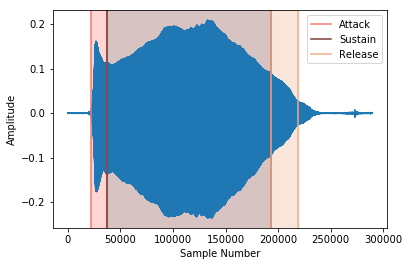

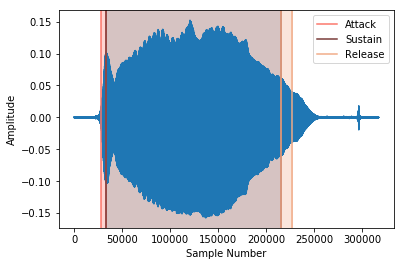

this


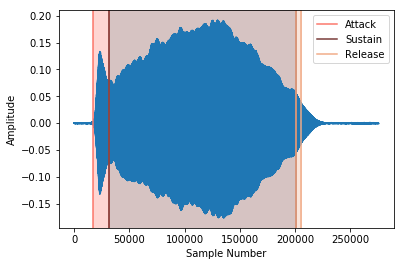

this


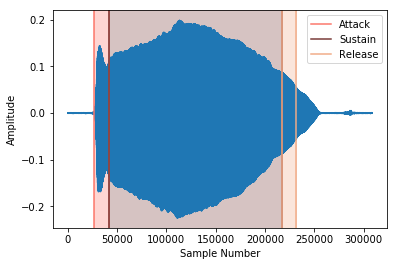

this


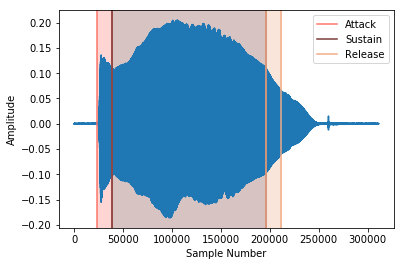

this


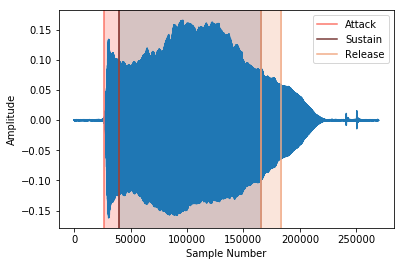

this


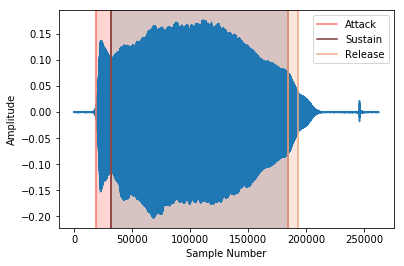

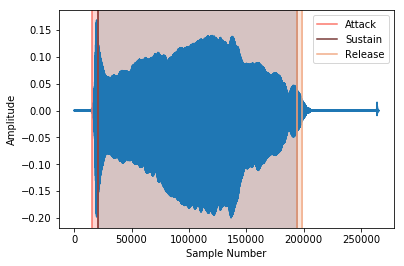

this


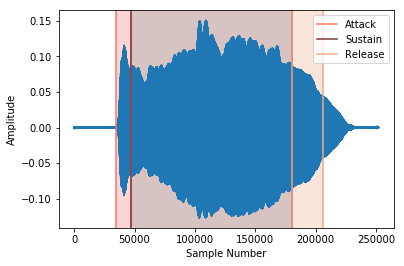

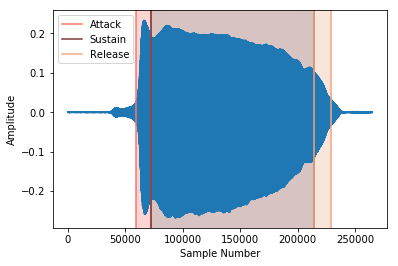

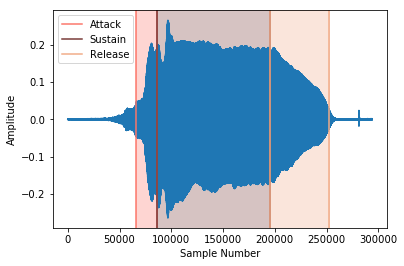

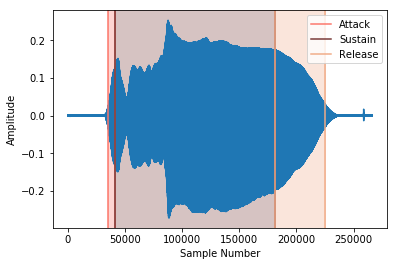

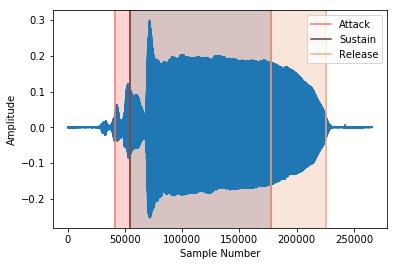

this


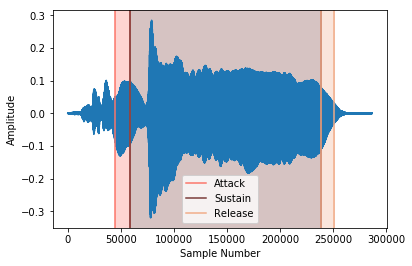

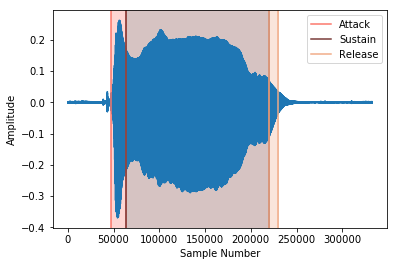

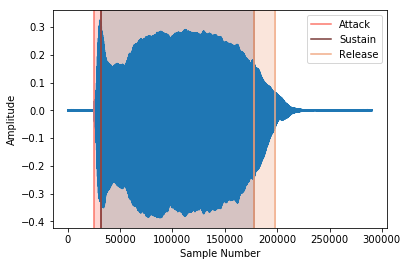

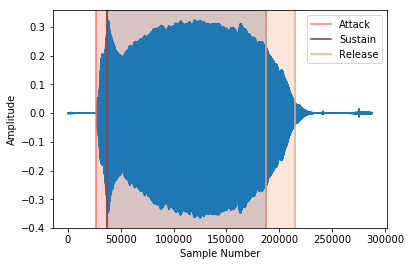

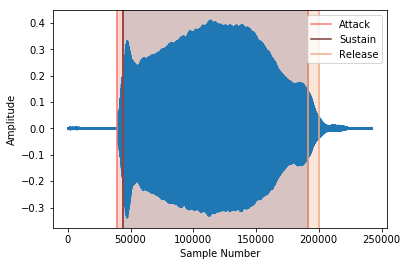

this


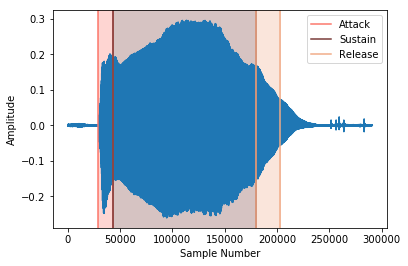

this


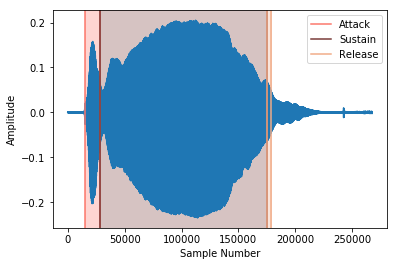

this


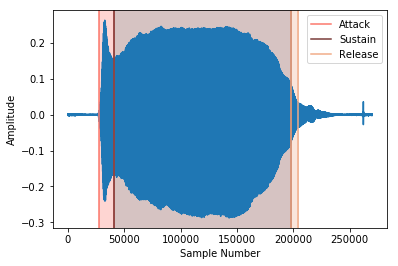

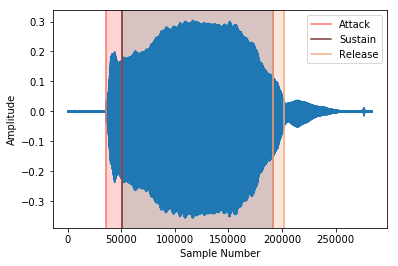

this


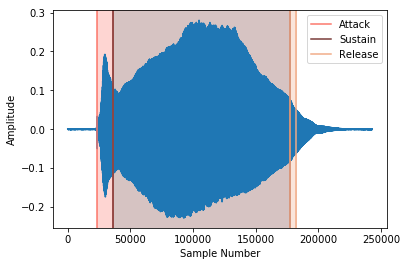

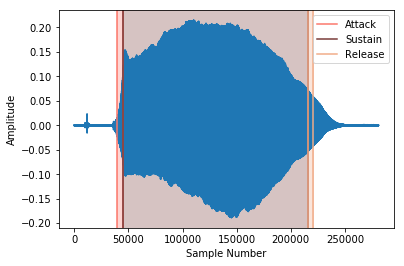

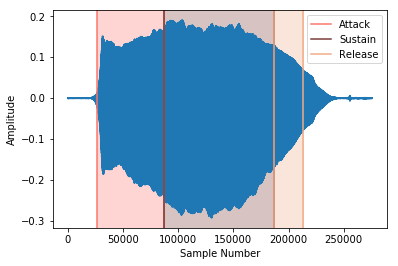

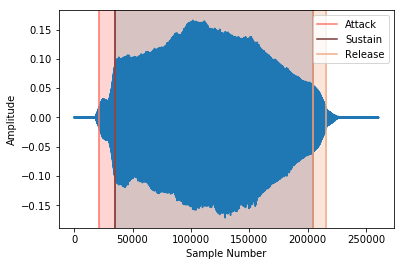

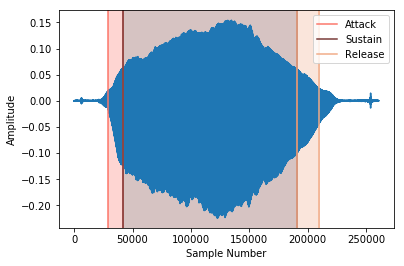

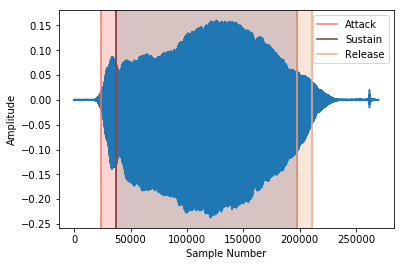

this


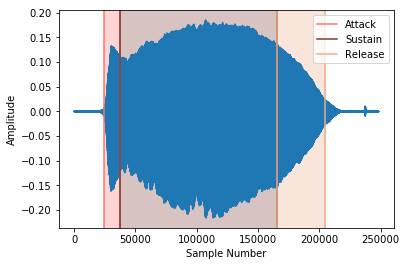

this


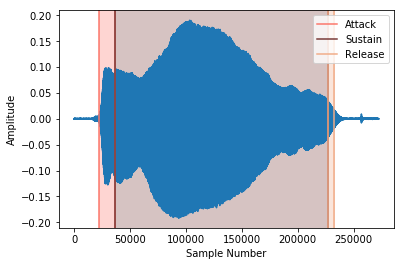

this


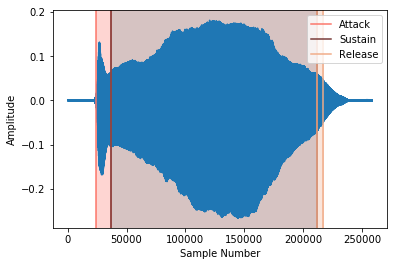

this


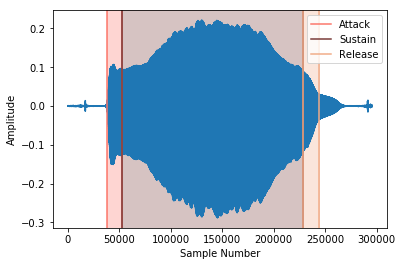

this


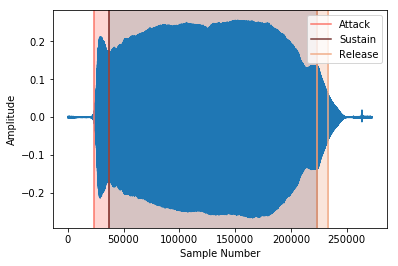

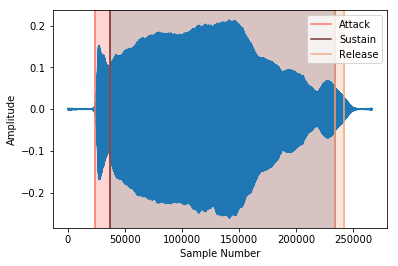

this


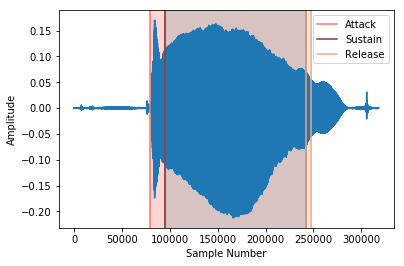

this


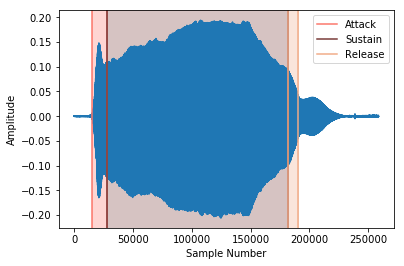

this


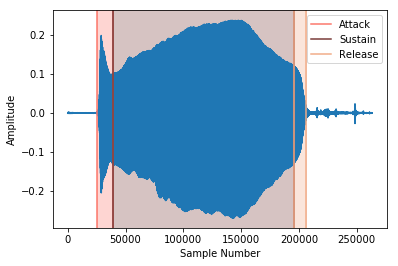

this


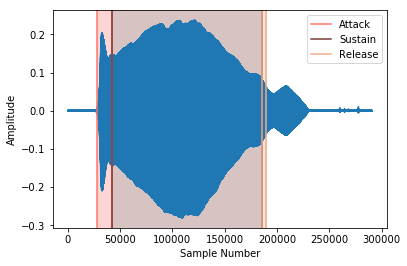

this


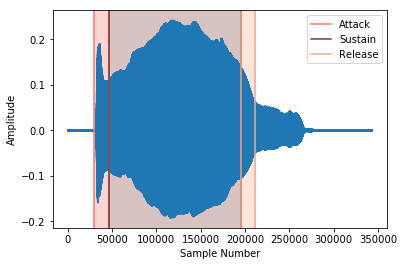

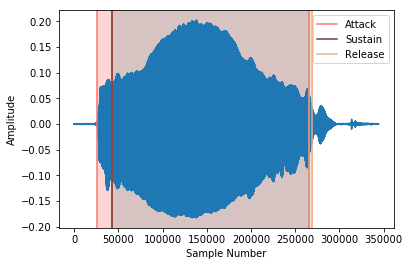

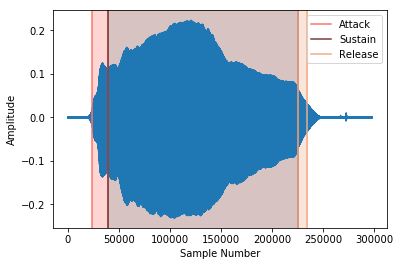

this


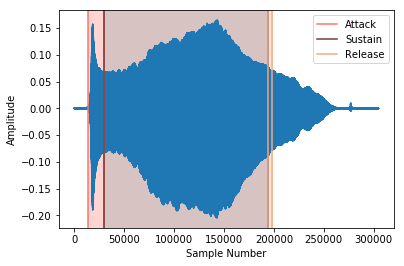

this


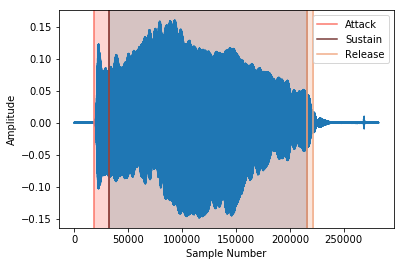

this


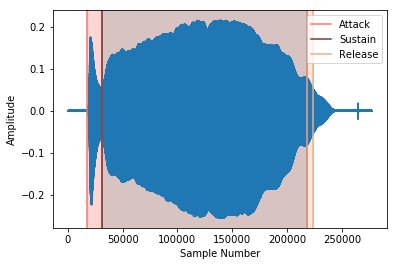

this


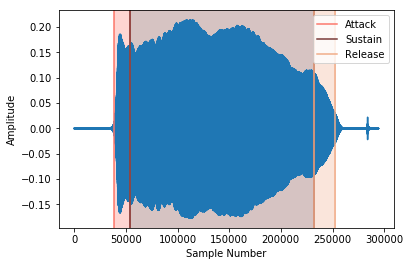

this


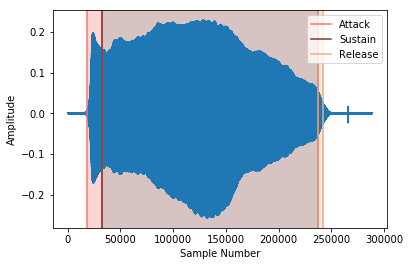

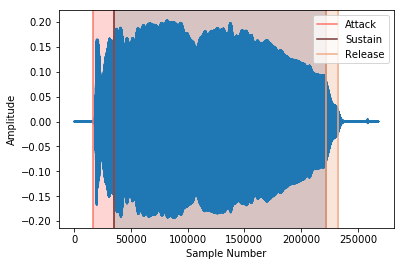

this


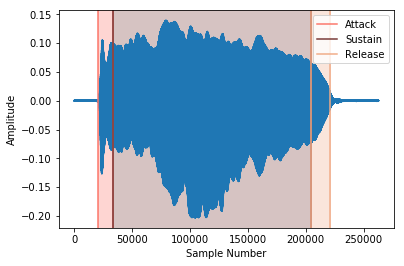

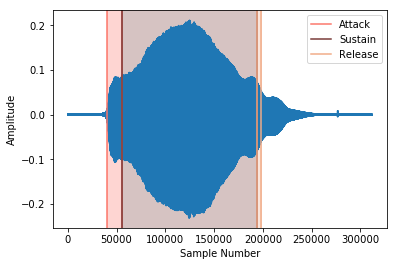

this


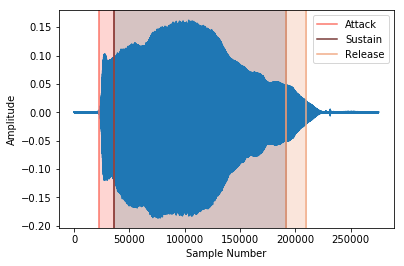

this


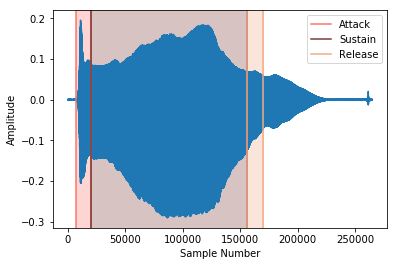

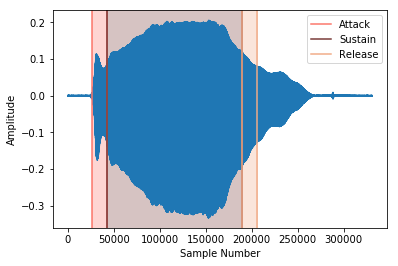

this


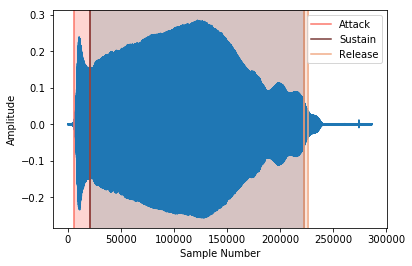

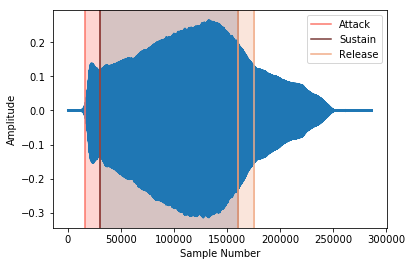

this


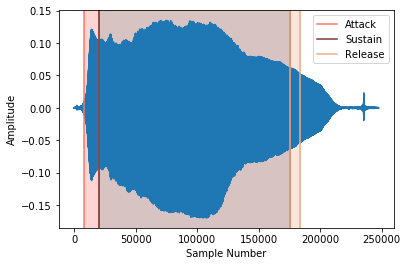

this


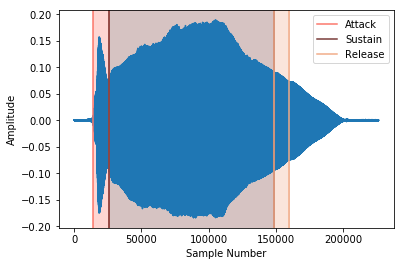

this


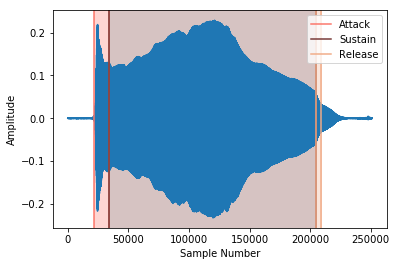

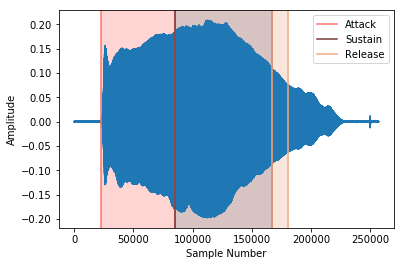

this


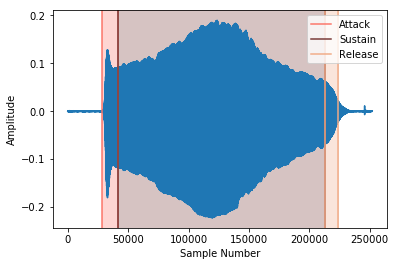

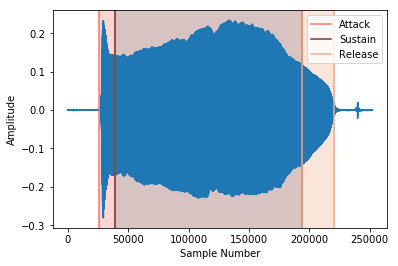

this


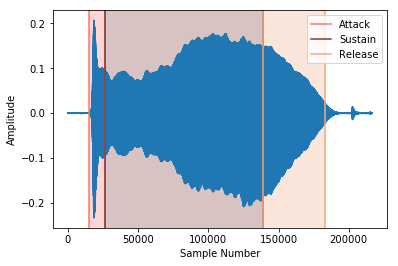

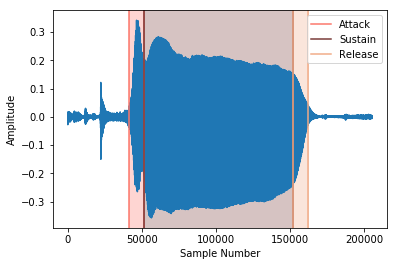

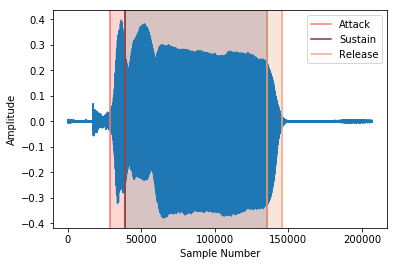

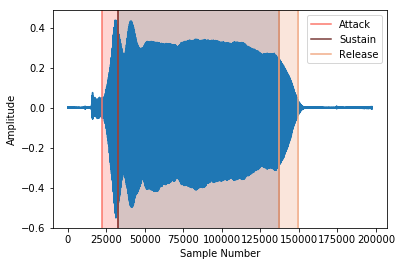

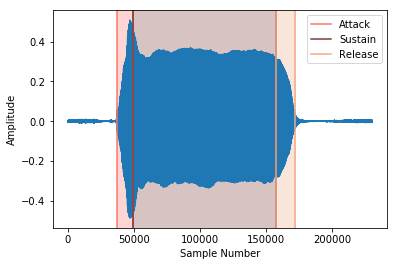

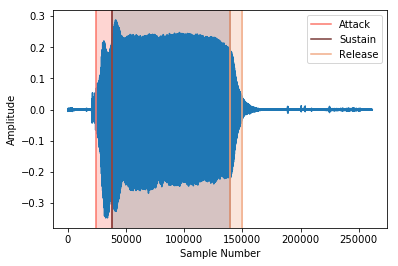

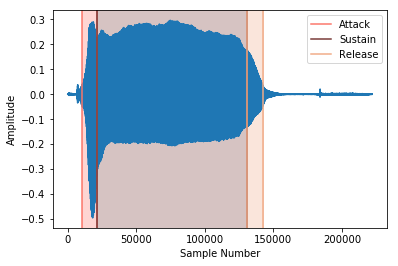

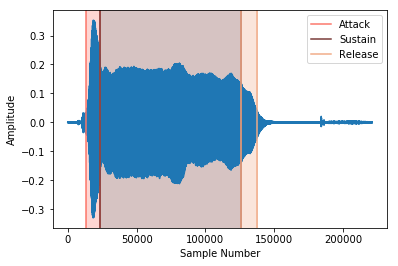

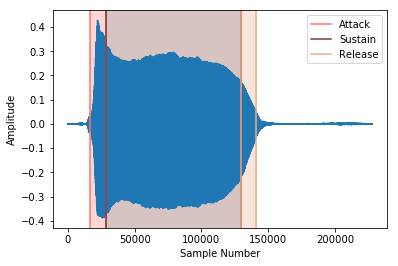

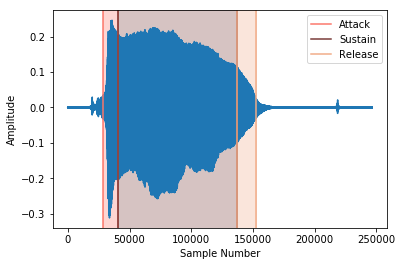

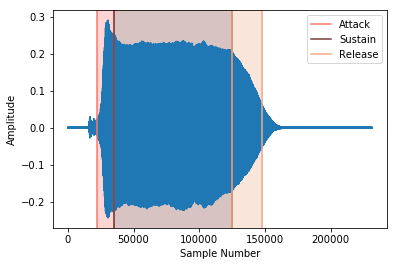

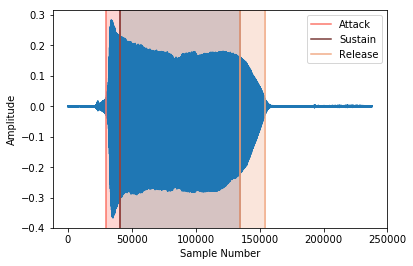

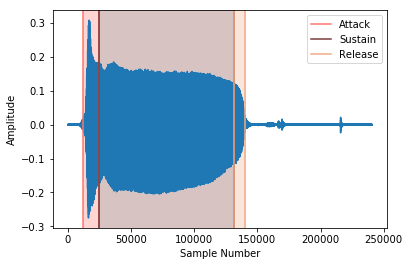

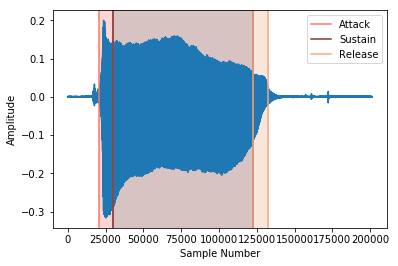

this


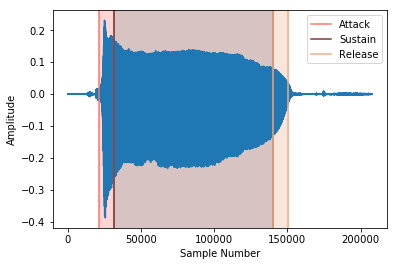

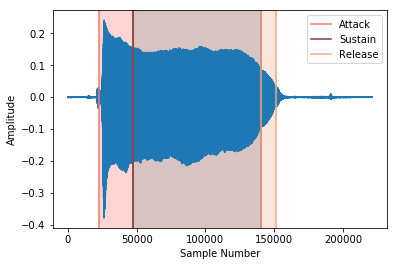

this


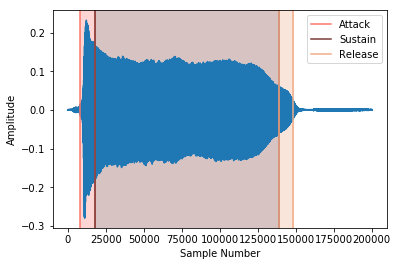

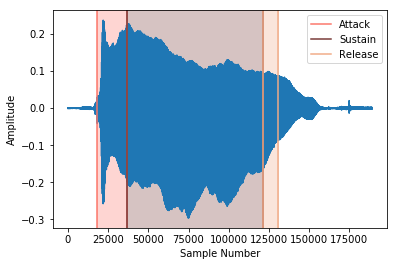

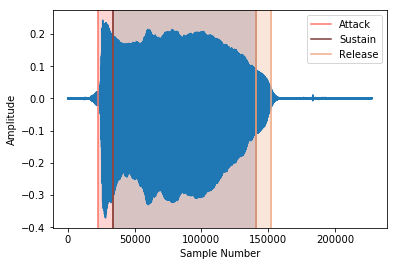

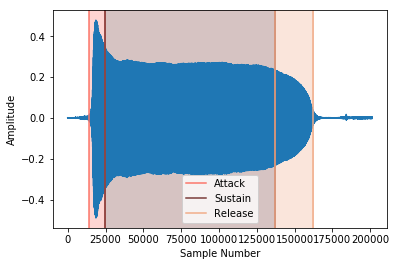

this


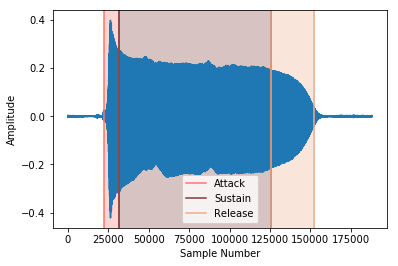

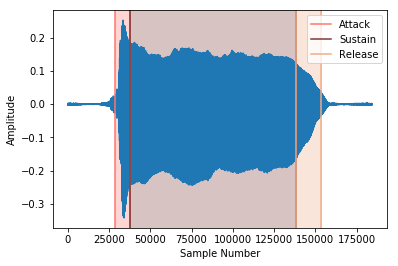

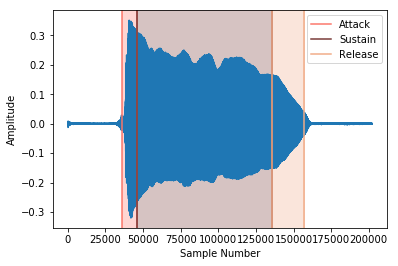

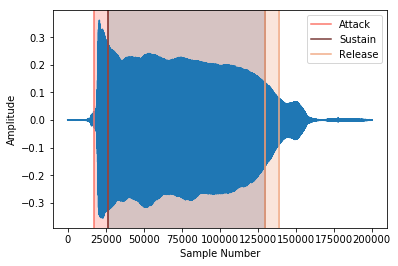

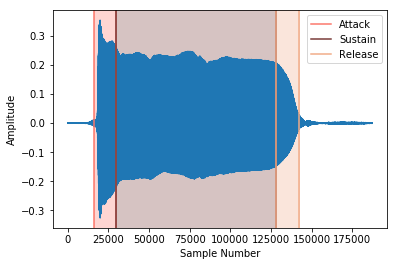

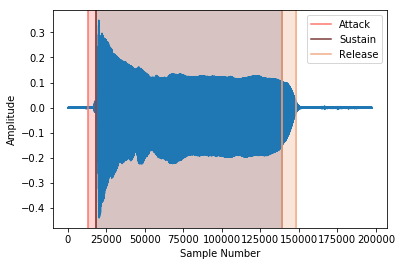

this


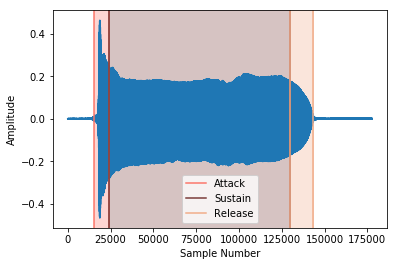

this


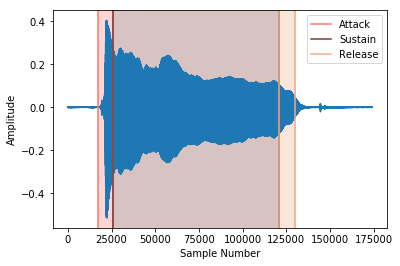

this


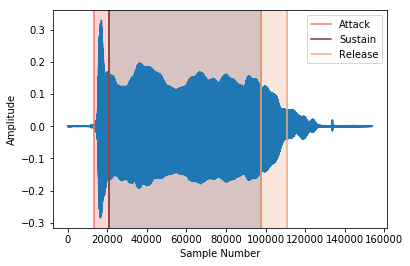

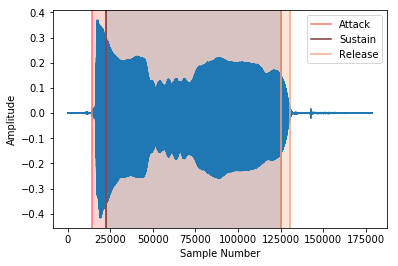

this


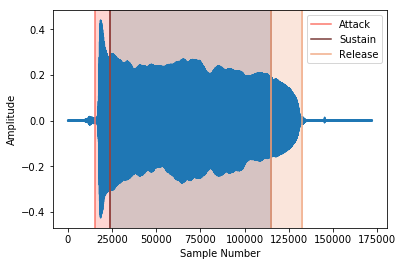

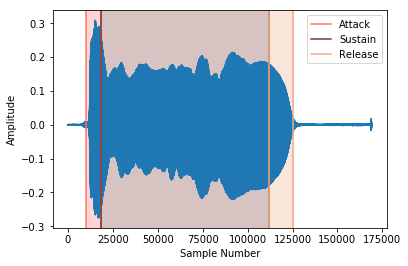

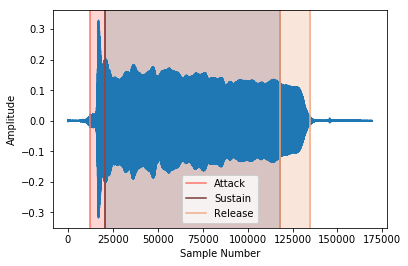

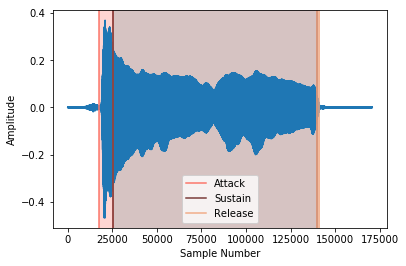

this


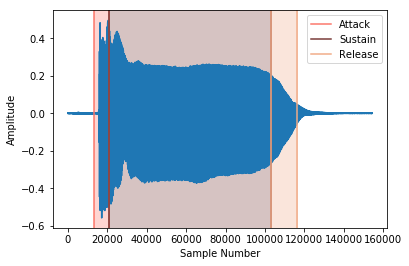

this


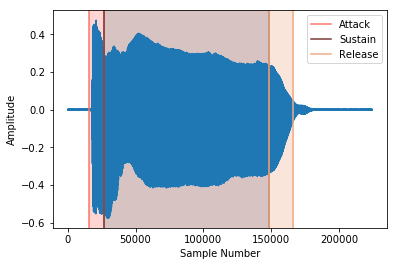

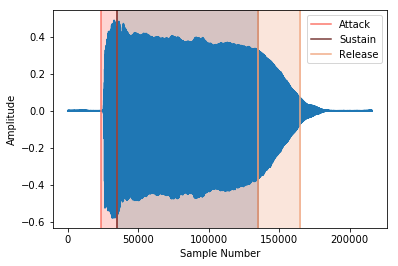

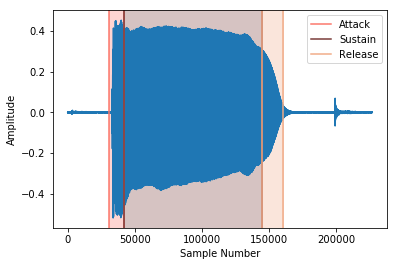

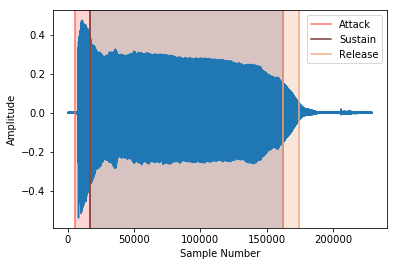

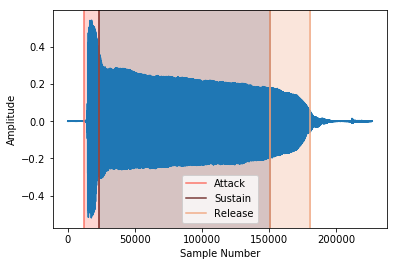

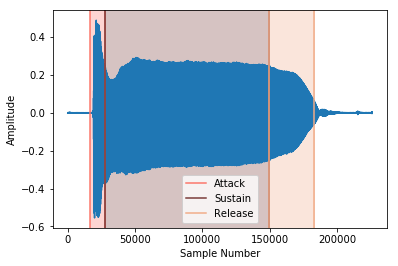

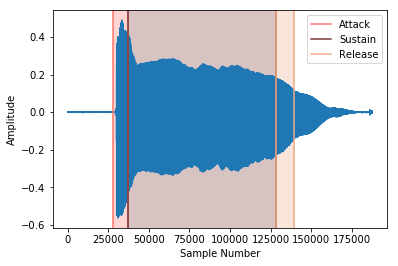

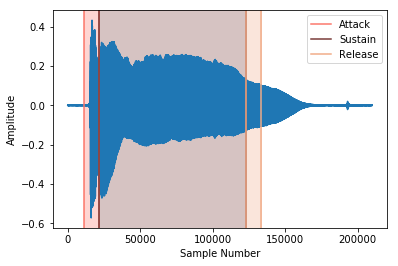

this


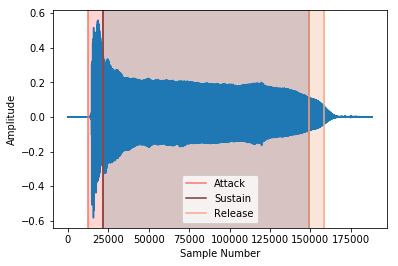

this


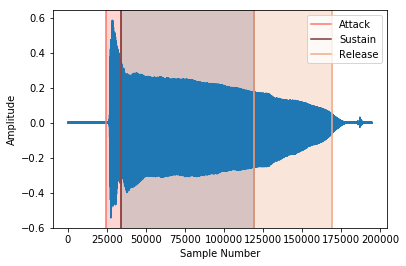

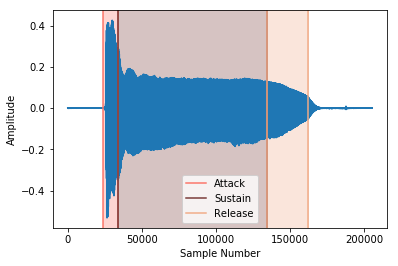

this


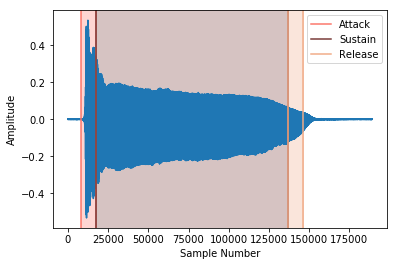

this


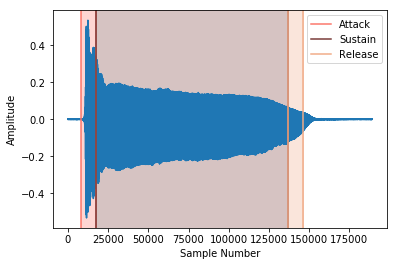

this


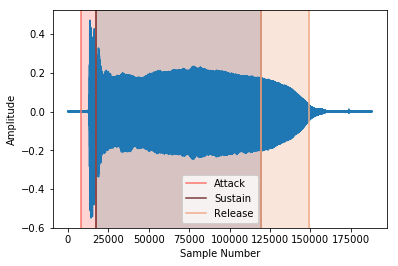

this


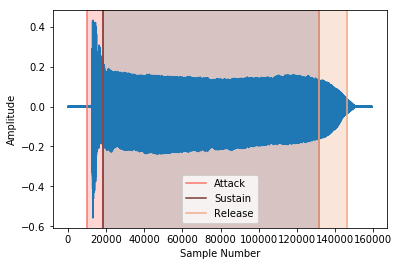

this


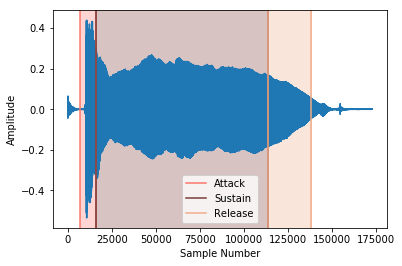

this


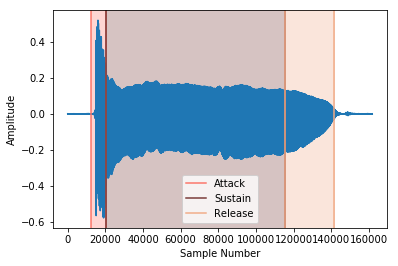

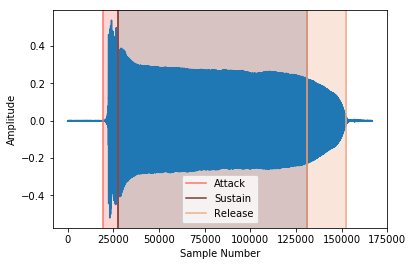

this


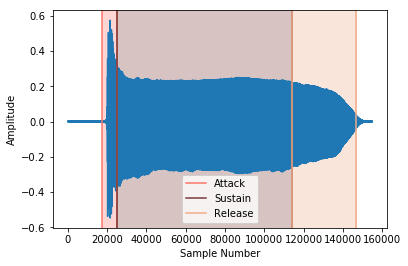

this


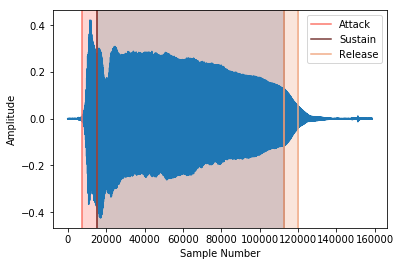

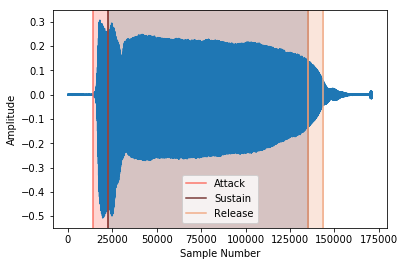

this


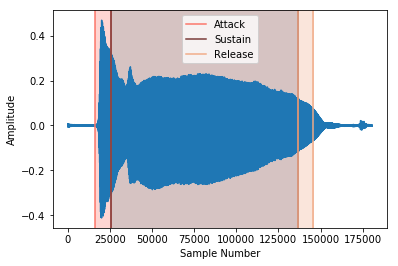

this


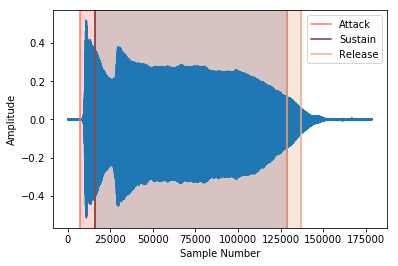

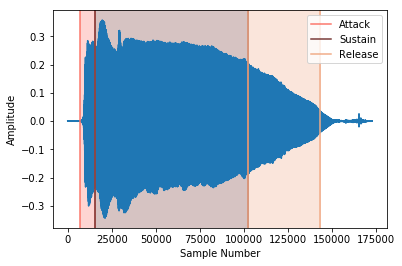

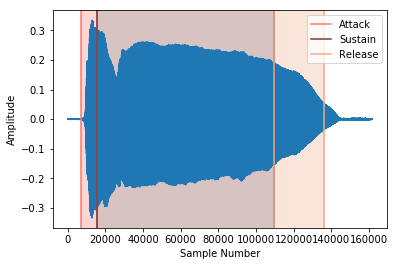

this


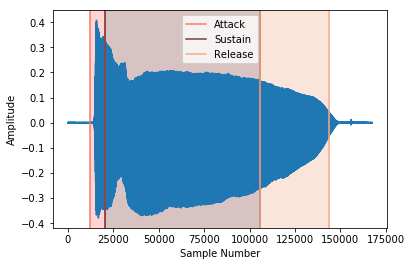

this


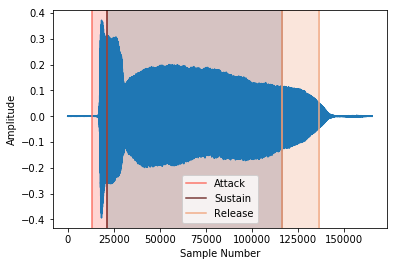

this


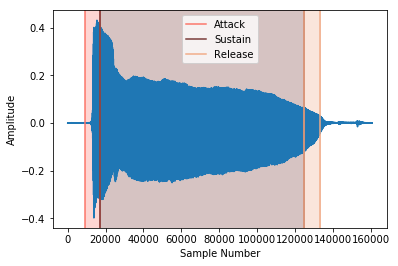

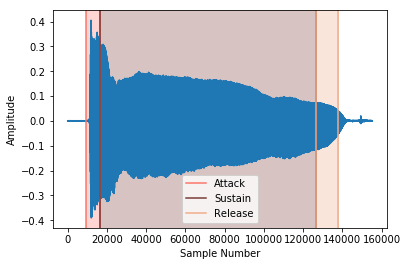

this


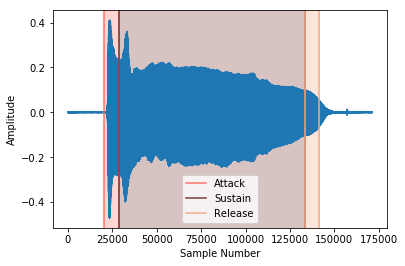

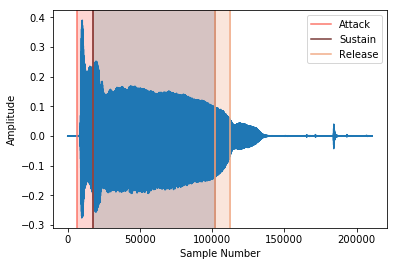

this


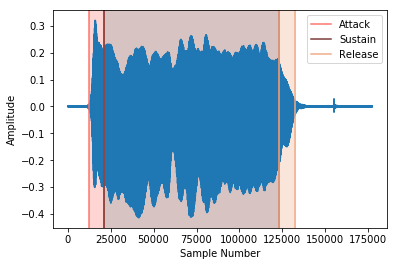

this


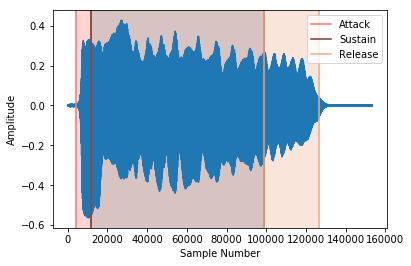

this


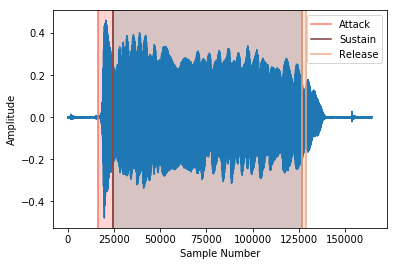

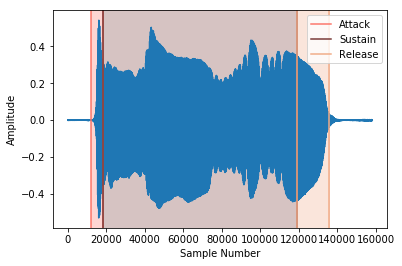

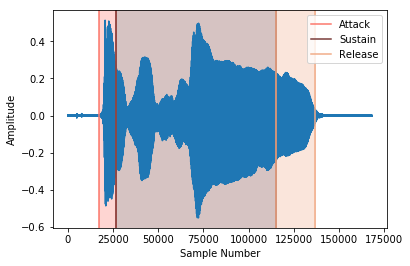

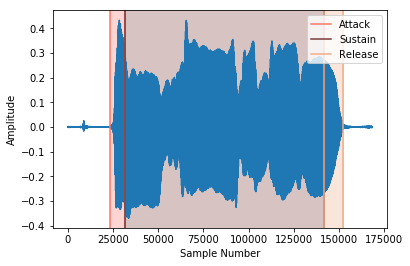

this


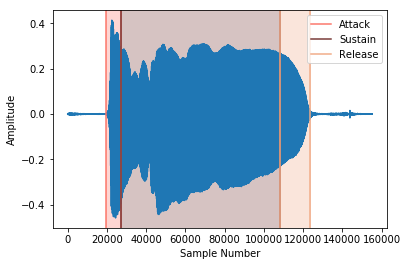

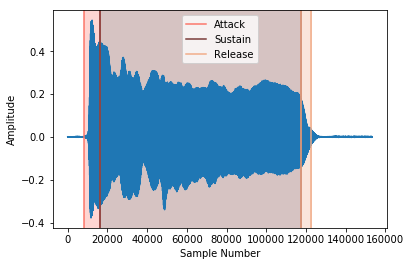

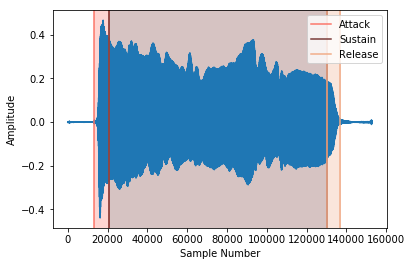

this


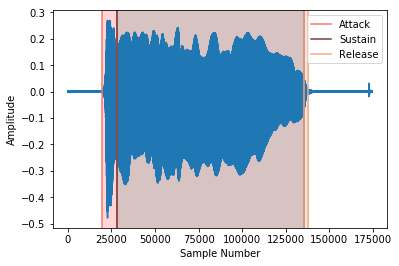

this


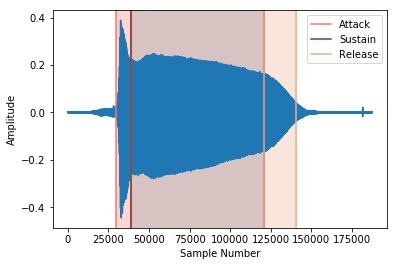

this


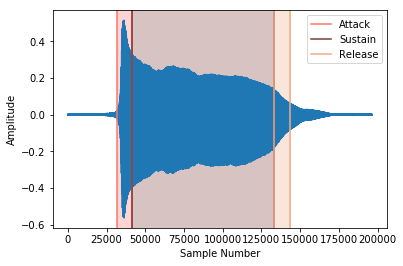

this


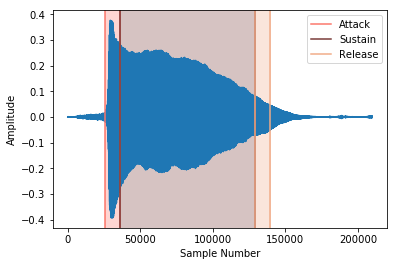

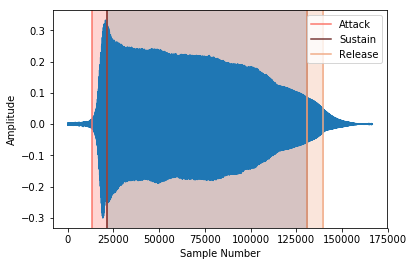

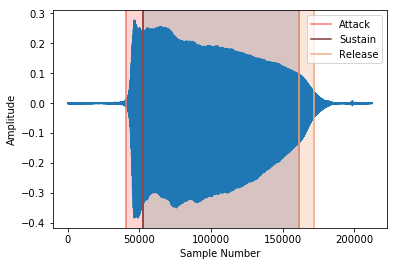

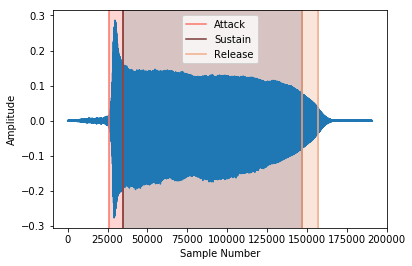

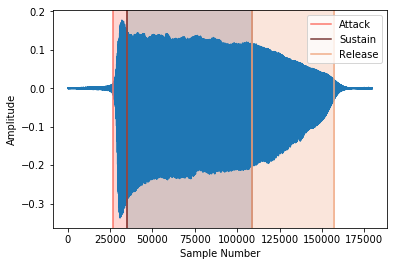

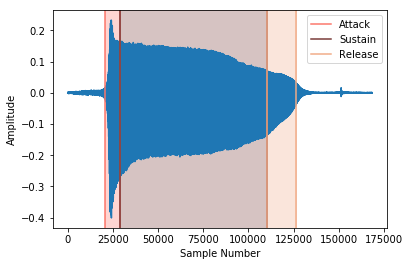

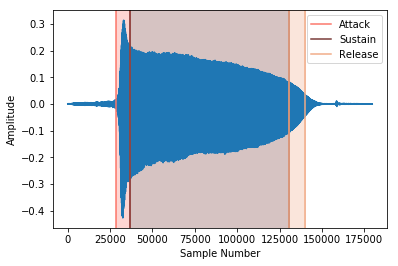

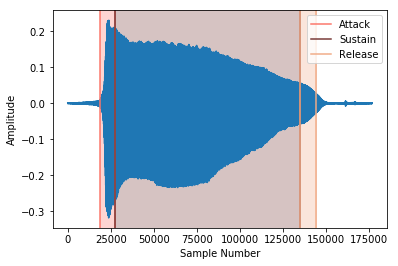

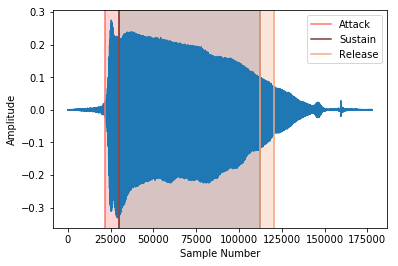

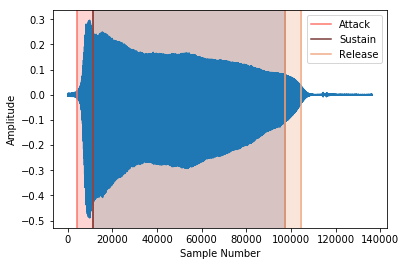

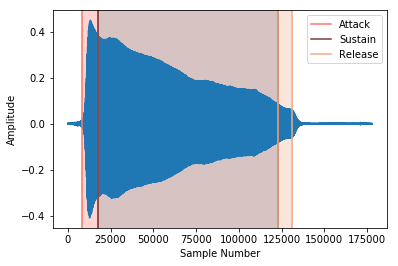

this


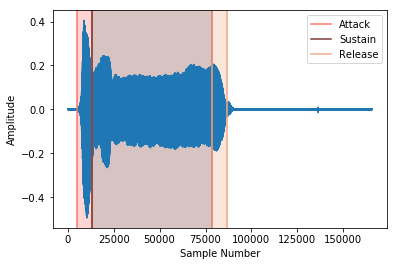

this


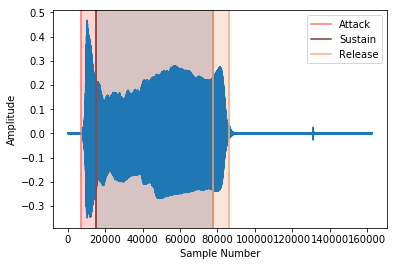

this


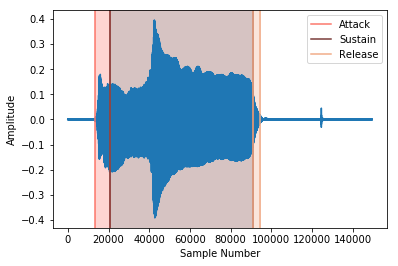

this


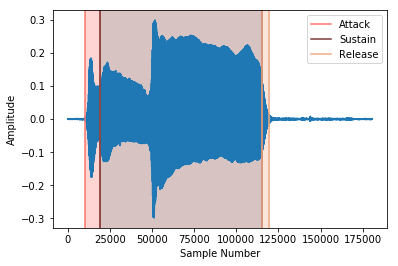

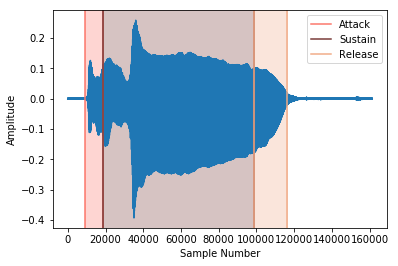

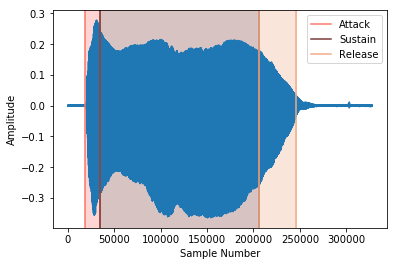

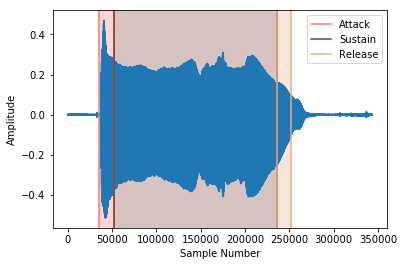

this


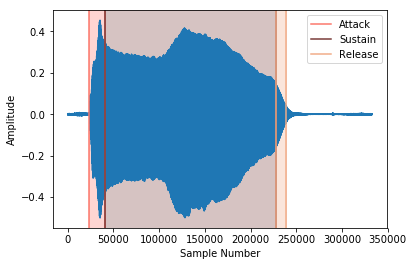

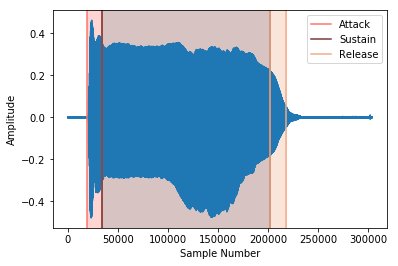

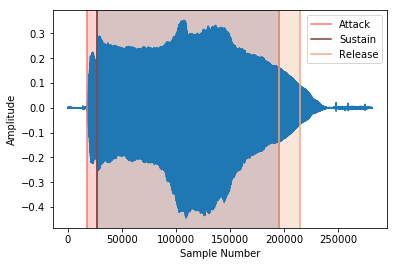

this


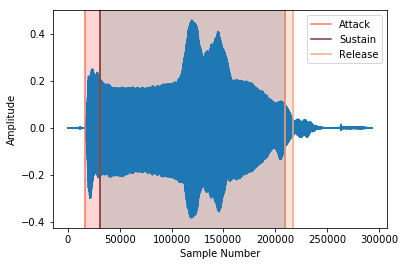

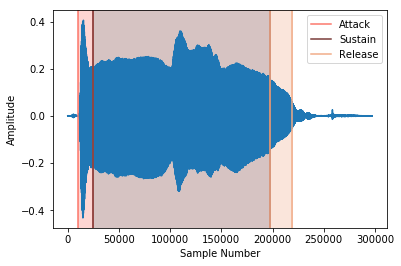

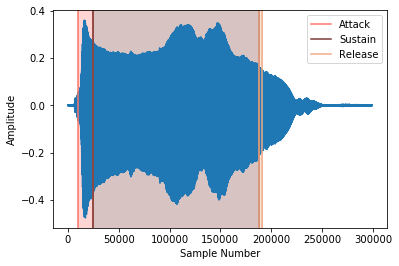

this


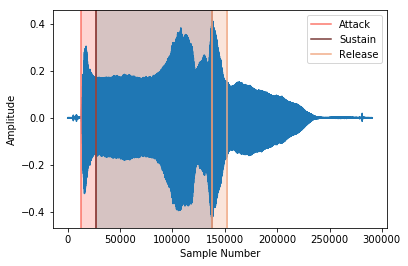

this


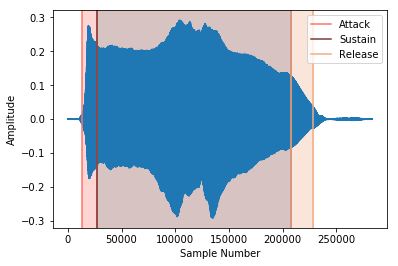

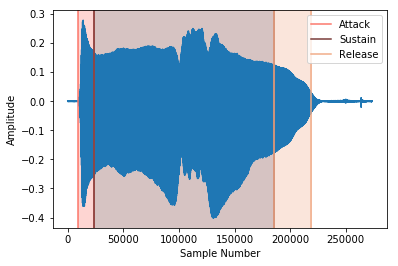

this


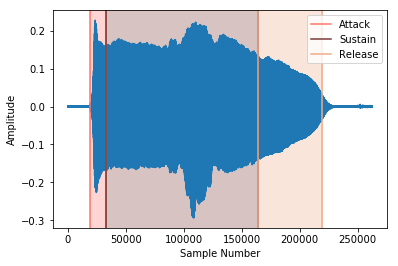

this


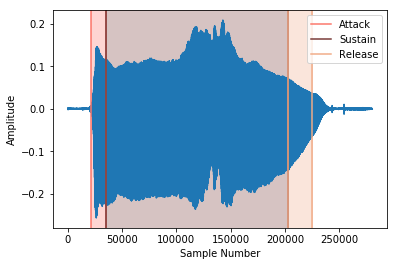

this


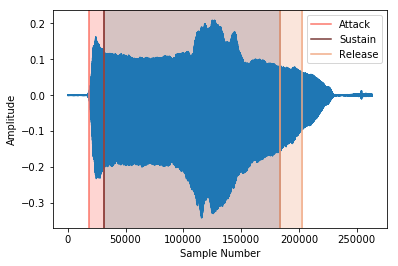

this


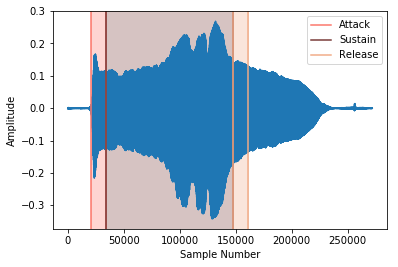

this


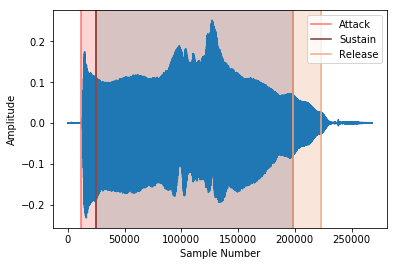

this


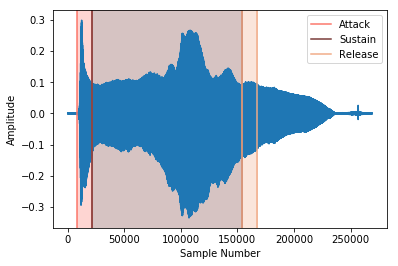

this


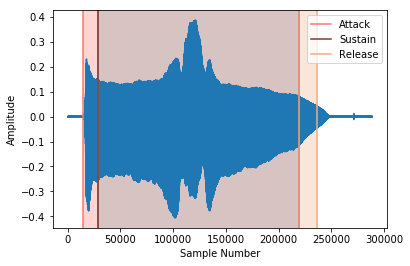

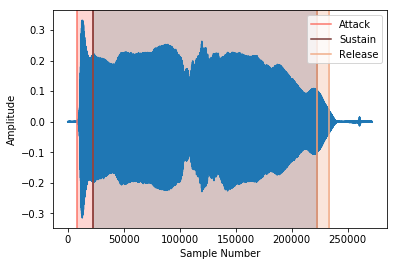

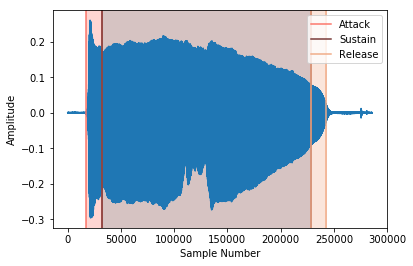

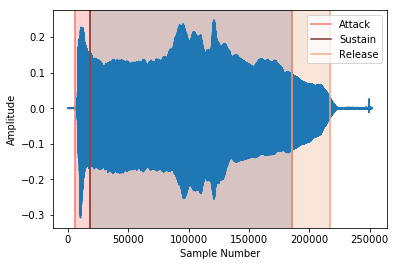

this


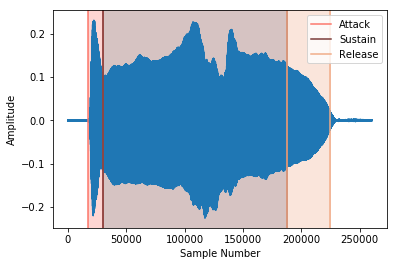

this


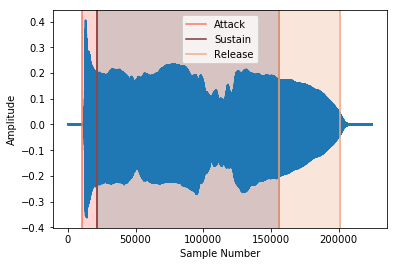

this


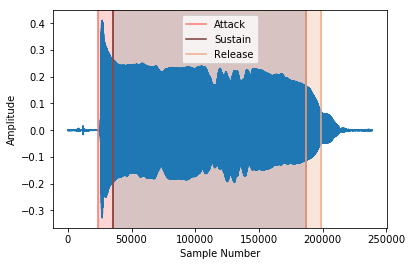

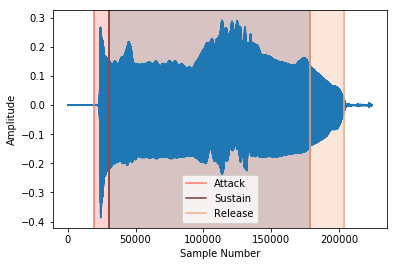

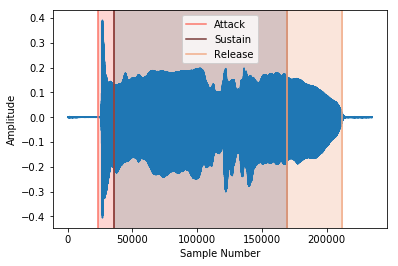

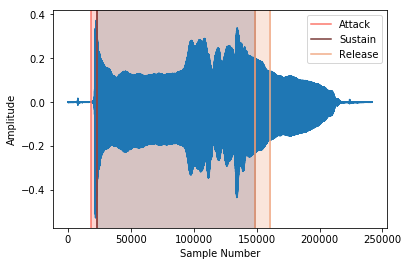

this


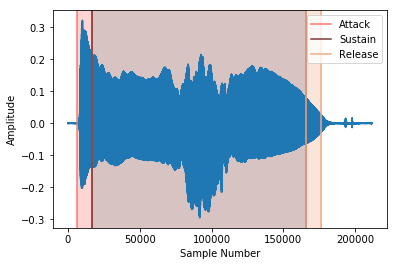

this


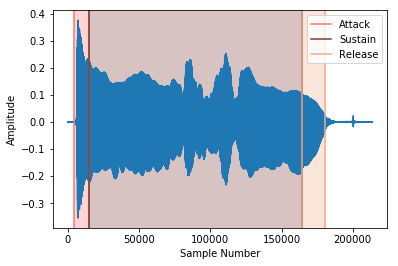

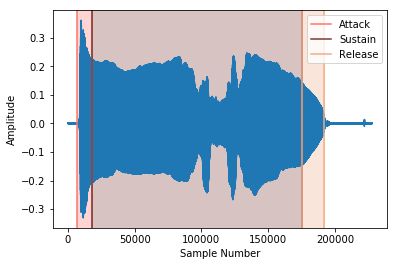

this


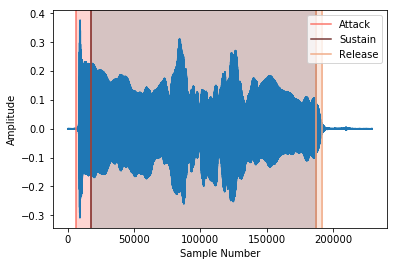

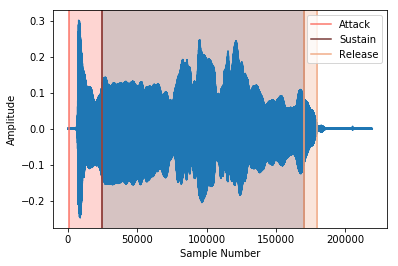

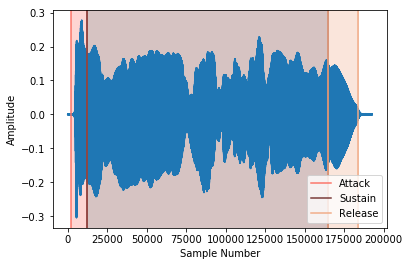

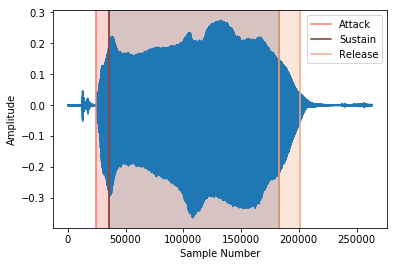

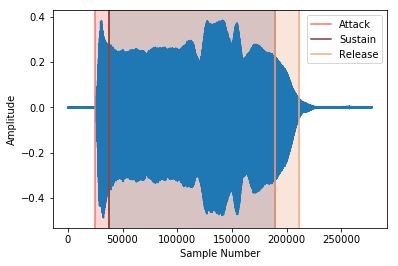

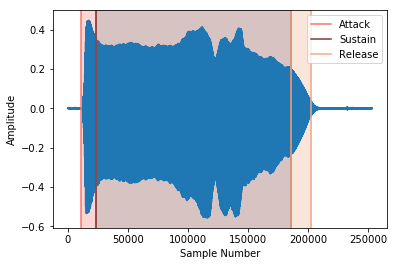

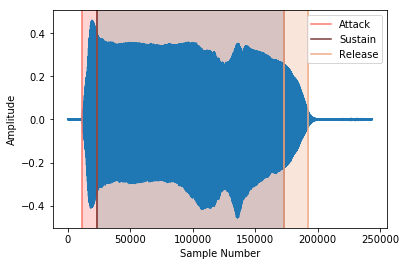

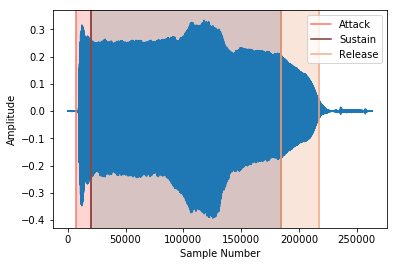

this


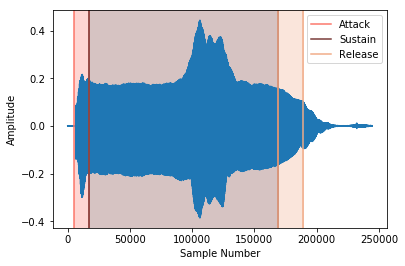

this


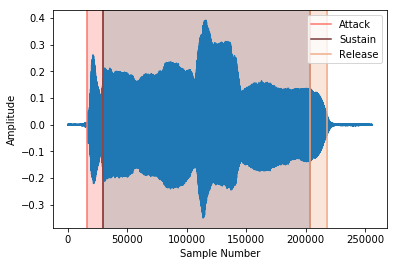

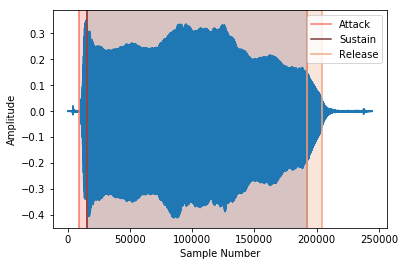

this


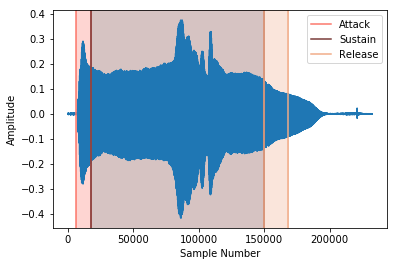

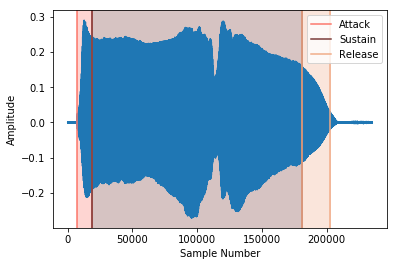

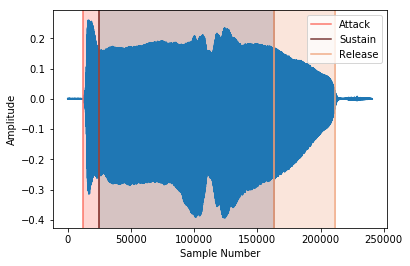

this


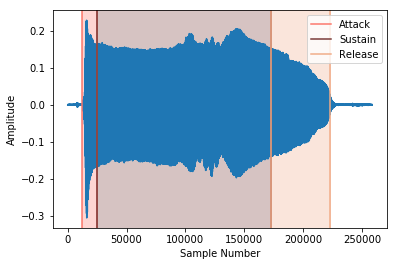

this


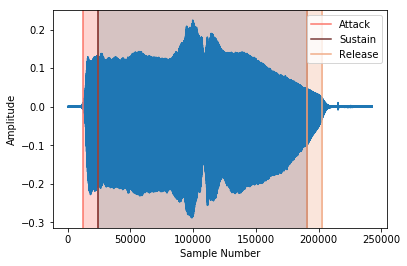

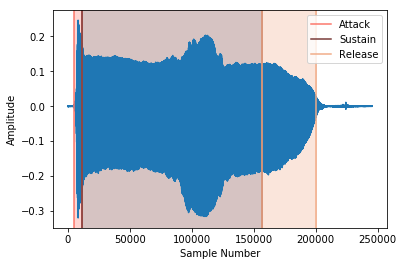

this


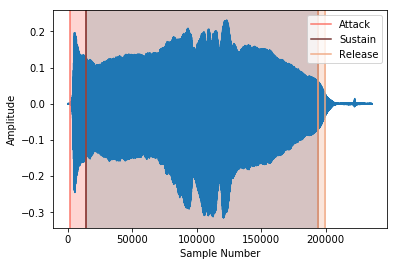

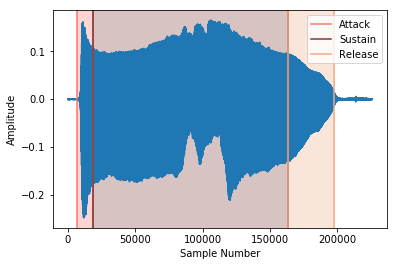

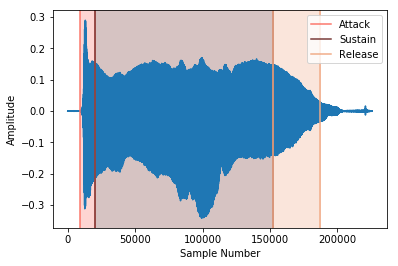

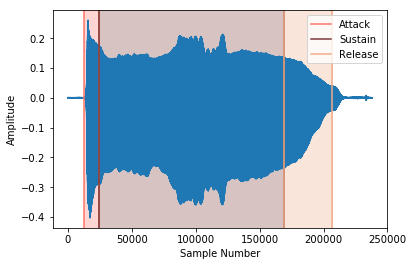

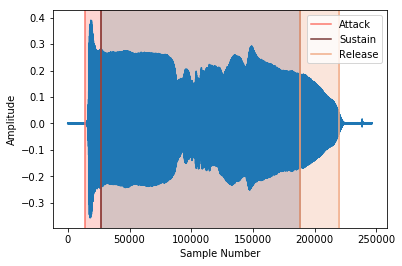

this


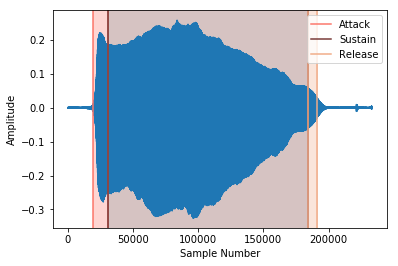

this


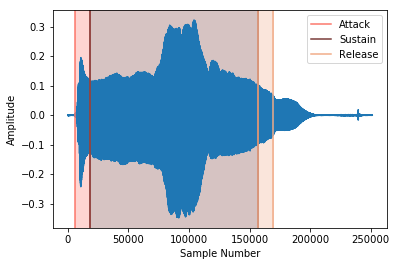

this


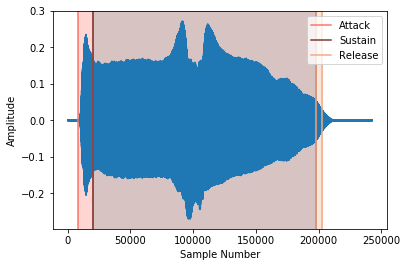

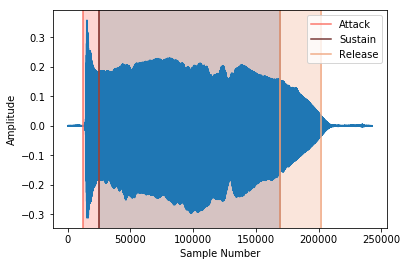

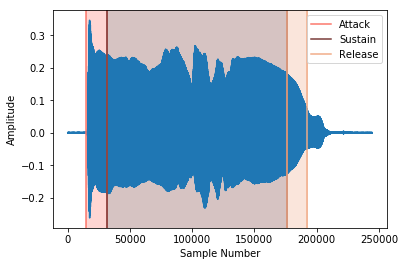

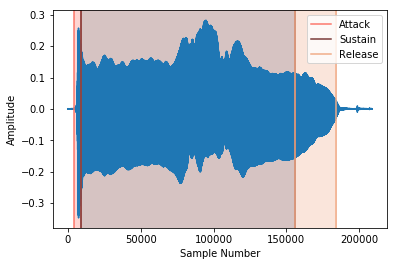

this


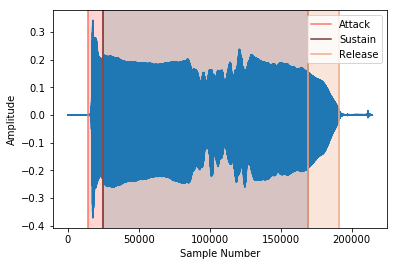

this


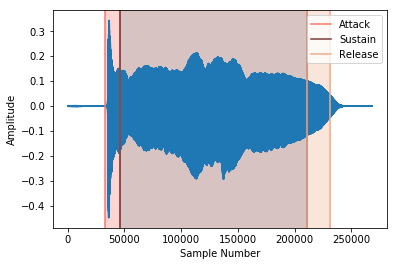

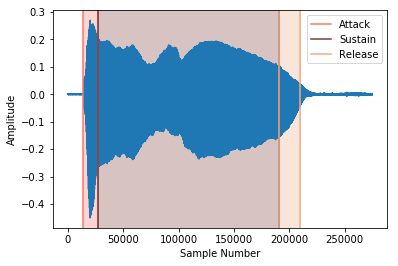

this


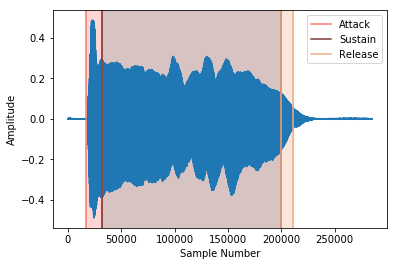

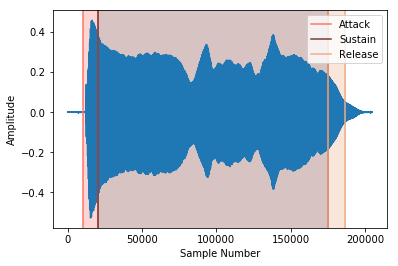

this


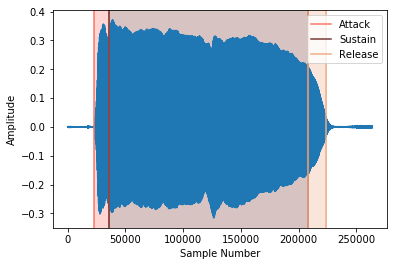

this


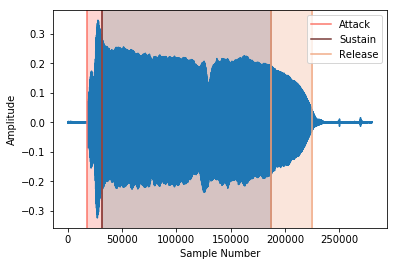

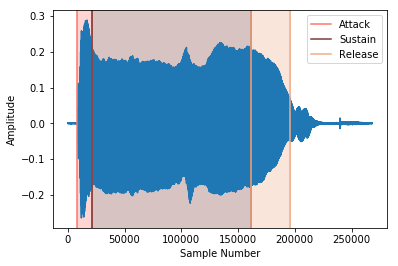

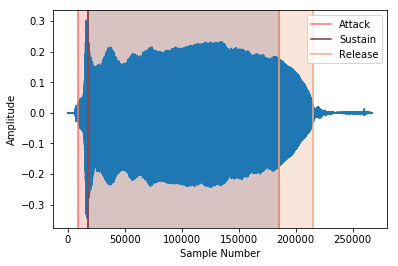

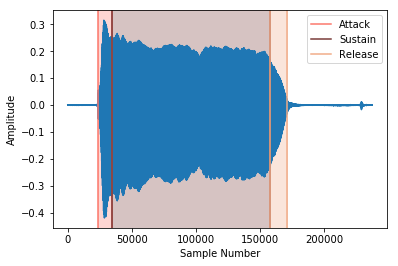

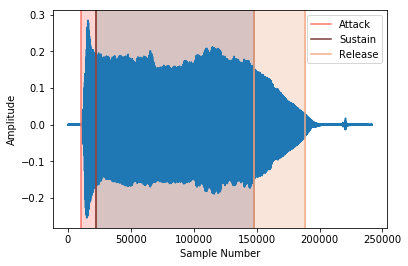

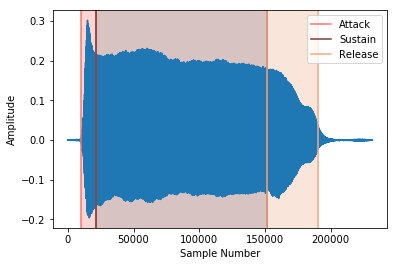

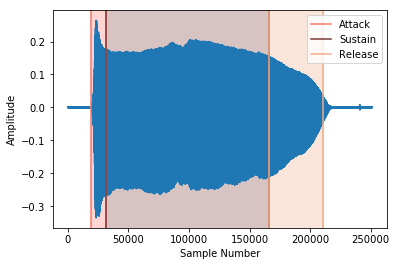

this


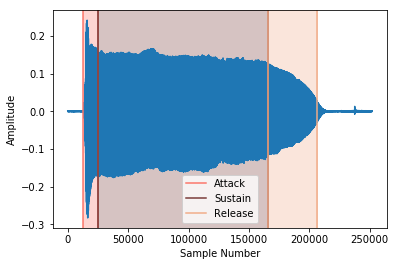

this


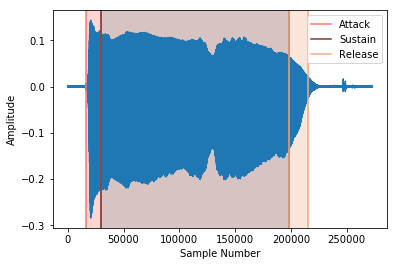

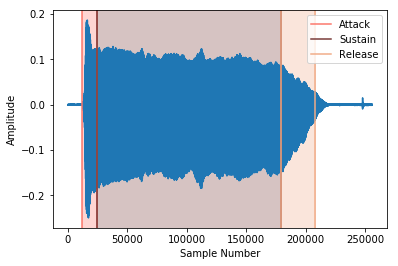

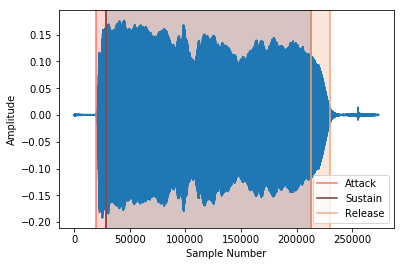

this


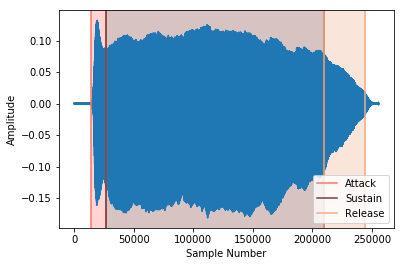

this


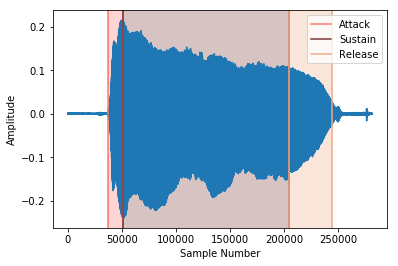

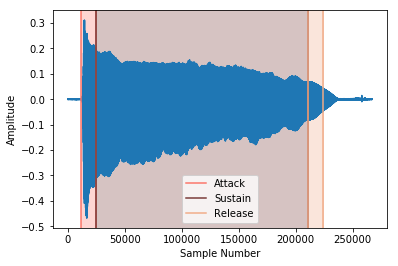

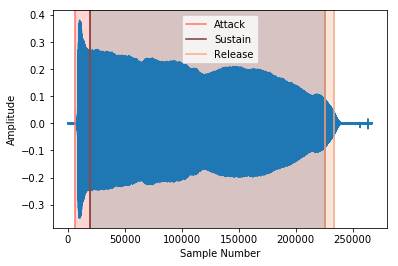

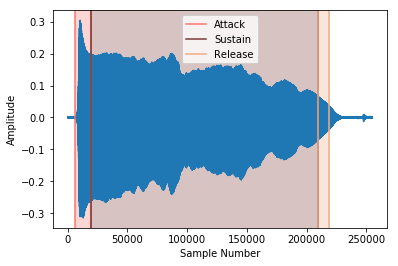

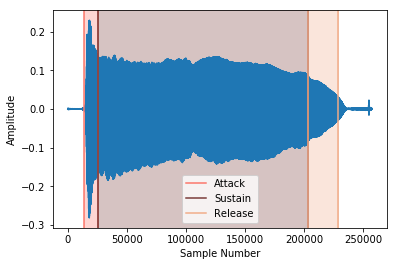

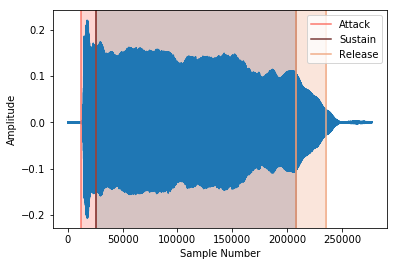

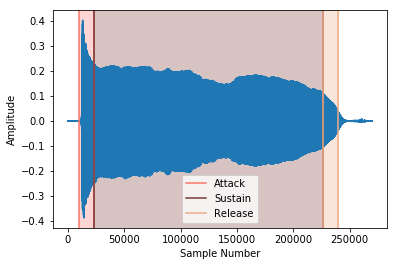

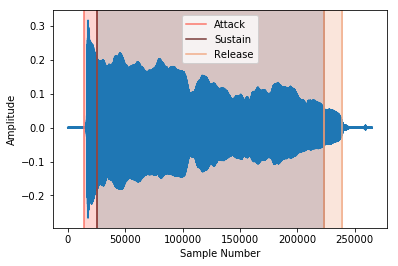

this


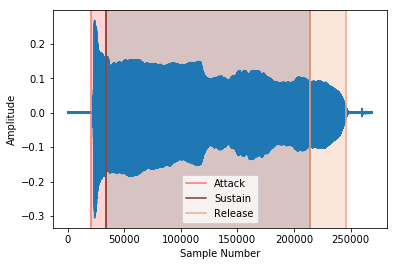

this


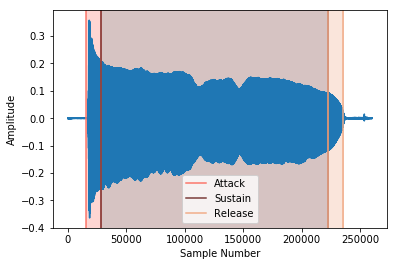

this


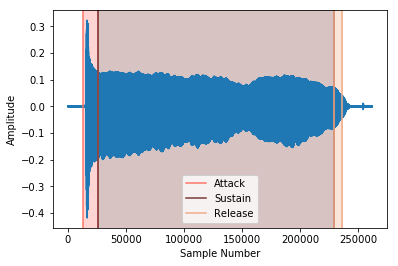

this


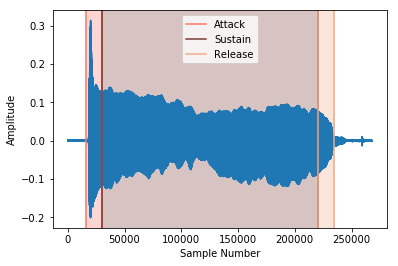

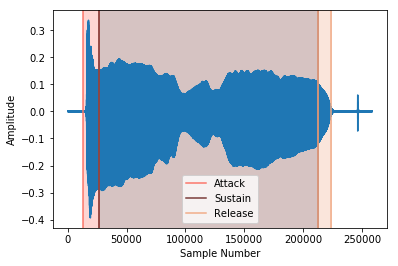

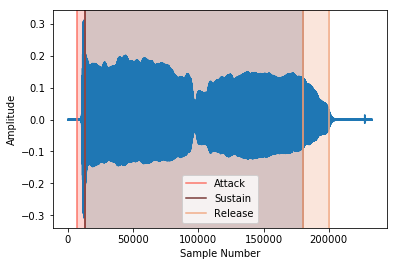

this


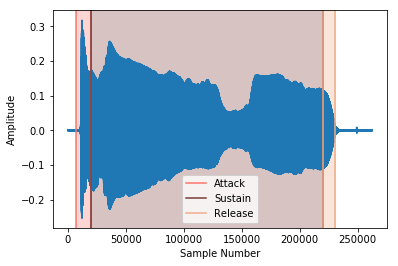

this


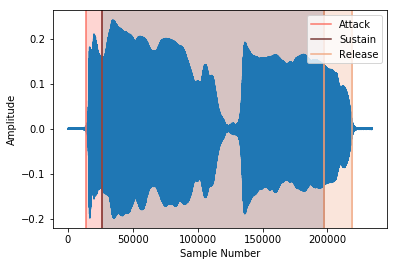

this


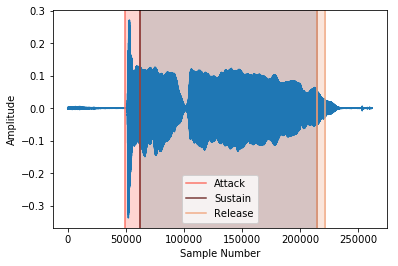

In [9]:
for i in range(len(audios)):
    #Load audio
    x = es.MonoLoader(filename=audios[i])()
    
    #Attack detection
    attack_start, attack_end = attack_detection(x, M = 5)
    
    #Release detection (attack but flipped)
    x_flip = np.array(np.flip(x))
    release_start_flip, release_end_flip = attack_detection(x_flip, M = 1.5)
    release_start = len(x_flip)-release_end_flip
    release_end = len(x_flip)-release_start_flip
    
    #Post processing conditions
    if attack_end-attack_start<fs/10:
        attack_end = attack_start+int(len(x)*0.05)
        print("this")
                                      
    if attack_end>release_start:
        caca = 1
    
    #Plot results
    if attack_end>release_start:
        ola = 0
    plt.plot(x)
    '''plt.axvline(attack_start, color = 'r')
    plt.axvline(attack_end, color = 'g')
    plt.axvline(release_start, color='b')
    plt.axvline(release_end, color='m')
    plt.title(audios[i])
    plt.show()'''
    
    att_col = '#FC766AFF'
    sust_col = '#783937FF'
    rel_col = '#F1AC88FF'
    plt.axvline(x=attack_start, color = att_col, label = 'Attack')
    plt.axvline(x=attack_end, color = att_col)
    plt.axvline(x=attack_end+1, color = sust_col, label = 'Sustain')
    plt.axvline(x=release_start-1, color = sust_col)
    plt.axvline(x=release_start, color = rel_col, label = 'Release')
    plt.axvline(x=release_end, color = rel_col)
    plt.axvspan(attack_start, attack_end, color = att_col, alpha = 0.3)
    plt.axvspan(attack_end, release_start, color = sust_col, alpha = 0.3)
    plt.axvspan(release_start, release_end, color = rel_col, alpha = 0.3)
    plt.legend()
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')
    plt.title('')
    #plot_name = os.path.join('saved_plots/AttackdetectionPlots', str(i))
    #plt.savefig(plot_name)
    plt.show()